<a href="https://colab.research.google.com/github/dhar9571/Retail-Sales-Prediction-ML-Regression/blob/main/Capstone_Project_Retail_Sales_Prediction_ML_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Prediction ML Regression


##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

**The project involves developing a machine learning model for regression analysis of the Rossmann drug store's daily sales data. The dataset comprises of information on the sales of the stores for several weeks in different European countries. The goal is to predict the sales for the upcoming six weeks based on various factors like promotions, competition, holidays, seasonality, and location.**


# **GitHub Link -**

profile link: https://github.com/dhar9571

project repository link: https://github.com/dhar9571/Retail-Sales-Prediction-ML-Regression.git

# **Problem Statement**


**The Rossmann drug stores need an accurate sales forecasting model that can help the managers predict their daily sales for the upcoming six weeks. Currently, the sales prediction varies significantly among the individual store managers due to the unique circumstances surrounding each store. The task is to develop a machine learning model that can accurately forecast the sales for the upcoming six weeks, considering various factors like promotions, competition, holidays, seasonality, and location. The model should provide a reliable and accurate prediction of the sales for the stores, enabling better decision-making and resource allocation for the company.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

### Dataset Loading

In [2]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset

rossmann_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Project - Retail Sales Prediction ML Regression/Rossmann Stores Data.csv")
store_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Project - Retail Sales Prediction ML Regression/store.csv")

<ipython-input-3-c3f2ee0203c4>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossmann_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Project - Retail Sales Prediction ML Regression/Rossmann Stores Data.csv")


### Dataset First View

In [4]:
store_data.shape

(1115, 10)

In [5]:
# Dataset First Look

rossmann_data.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [6]:
# Dataset First Look

store_data.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [7]:
# Merging the dataset

df = pd.merge(rossmann_data, store_data, on="Store",how="left")

### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count

print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 1017209
Number of columns: 18


### Dataset Information

In [9]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count

df.duplicated().sum()

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count

df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

Text(0.5, 1.0, 'Missing Values Heatmap')

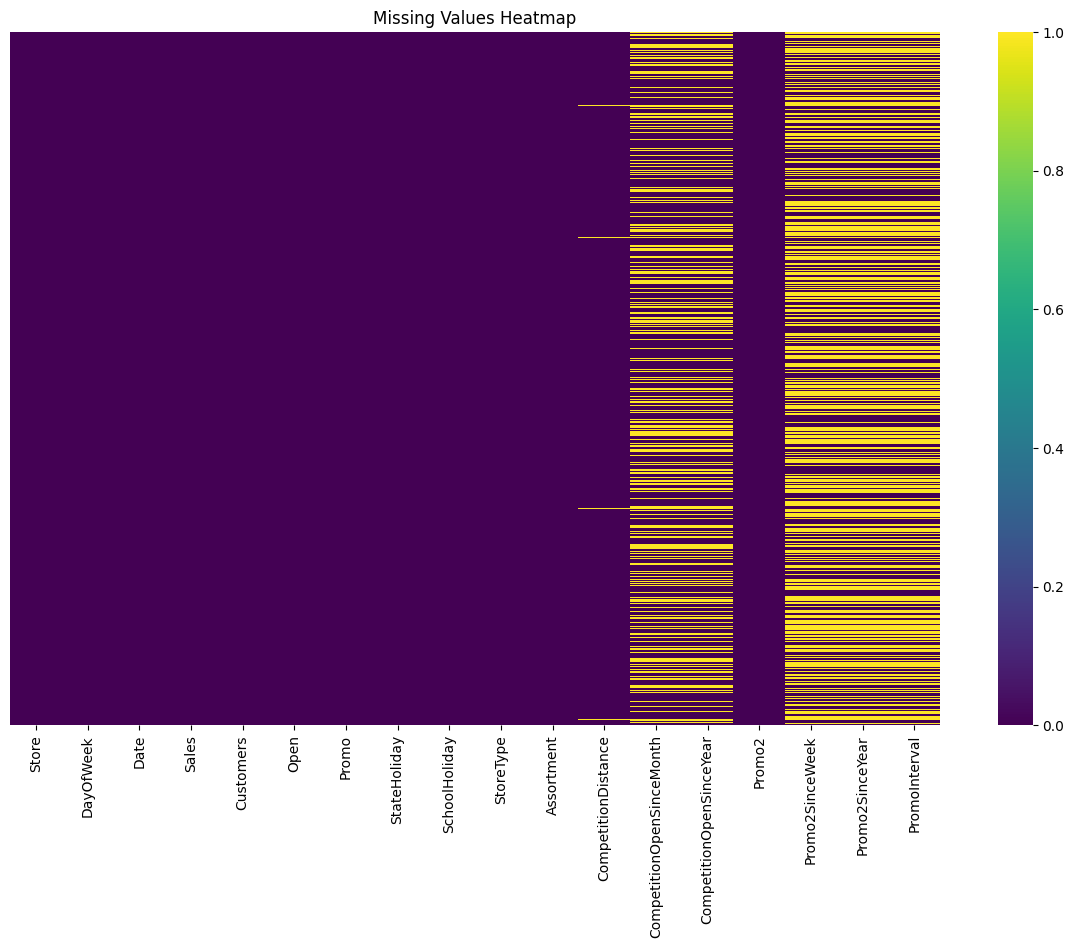

In [12]:
# Visualizing the missing values

# setting up figure size:
plt.figure(figsize=(15, 9))

sns.heatmap(df.isna(),yticklabels=False,cbar=True,cmap='viridis')
plt.title("Missing Values Heatmap")

**Why did you pick the specific chart?**

Heatmaps allow us to visualize the missing values in the context of the entire DataFrame, which can be useful for identifying patterns and correlations in the missing data.

**What is/are the insight(s) found from the chart?**

I am able to identify that in the entire dataframe, Promo2SinceWeek, Promo2SinceYear and PromoInterval columns have highest and equal number of null values. Besides this, CompetitionOpenSinceMonth and CompetitionOpenSinceYear columns also have a lot of null values. CompetitionDistance column has few null values.

**Will the gained insights help creating a positive business impact?**

Plotting missing values as a heatmap is important for ensuring data quality, cleaning the data, gaining insights, and preparing the data for further analysis or modeling.

### What did you know about your dataset?

1. The Dataset was devided into two different dataframes rossmann_data and store_data with common/primary key column "store".

2. The dataset has no duplicate rows.

3. The dataset has 2642 null values in CompetitionDistance column, 323348 null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear columns and 508031 null values in Promo2SinceWeek, Promo2SinceYear and PromoInterval columns.

4. The dataset has 1017209 rows and 18 columns.

5. Dependent feature name is "Sales".

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns

df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [14]:
# Dataset Describe

df.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  CompetitionDistance  \
count  1.017209e+06   1.017209e+06         1.014567e+06   
mean   3.815145e-01   1.786467e-01         5.430086e+03   
std    4.857586e-01   3.830564e-01         7.715324e+03   
min    0.000000e+00   0.000000e+00         2.000000e+01   
25%    0.000000e+00   0.000000e+00         7.100000e+02   
50%    0.000000e+00   0.000000e+00         2.330000e+03   
75%    1.000000e+00   0.000000e+00         6.890000e+03   
max    1.000000e+00   1.000000e+00         7.586000e+04   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear        Promo2  \
count              693861.000000             693861.000000  1.017209e+06   
mean                    7.222866               2008.690228  5.005638e-01   
std                     3.211832                  5.992644  4.999999e-01   
min                     1.000000               1900.000000  0.000000e+00   
25%                     4.000000               2006.000000  0.000000e+00   
50%                     8.000000               2010.000000  1.000000e+00   
75%                    10.000000               2013.000000  1.000000e+00   
max                    12.000000               2015.000000  1.000000e+00   

       Promo2SinceWeek  Promo2SinceYear  
count    509178.000000    509178.000000  
mean         23.269093      2011.752774  
std          14.095973         1.662870  
min           1.000000      2009.000000  
25%          13.000000      2011.000000  
50%          22.000000      2012.000000  
75%          37.000000      2013.000000  
max          50.000000      2015.000000

### Variables Description

####**Store**: the unique identifier.

####**DayOfWeek**: the day of the week).

####**Date**: the date of sales.

####**Sales**: the amount of sales.

####**Customers**: the number of customers in a particular store on a given date.

####**Open**: indicates whether the store was open or closed on a given date.

####**Promo**: indicates whether a store was running a promo on a given date .

####**StateHoliday**: indicates whether a state holiday was on a given date.

####**SchoolHoliday**: indicates whether a school holiday was on a given date.

####**StoreType**: indicates the type of store.

####**Assortment**: indicates the assortment level of the store.

####**CompetitionDistance**: the distance of the store to the nearest competitor store.

####**CompetitionOpenSinceMonth**: the month of the year when the nearest competitor store was opened.

####**CompetitionOpenSinceYear**: the year when the nearest competitor store was opened.

####**Promo2**: indicates whether a store is running a continuous promotion.

####**Promo2SinceWeek**: the calendar week when the store started to run a continuous promotion.

####**Promo2SinceYear**: the year when the store started to run a continuous promotion.

####**PromoInterval**: the interval between the consecutive starts of the continuous promotion.

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
df.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.

# Setting up to show all the columns
pd.set_option('display.max_columns',None)

In [17]:
# Creating Date, Month and Year columns using Date columns:

df["Day"] = df["Date"].apply(lambda x: x.split("-")[2])
df["Month"] = df["Date"].apply(lambda x: x.split("-")[1])
df["Year"] = df["Date"].apply(lambda x: x.split("-")[0])

In [18]:
# Removing Date column as it is not required now:

df.drop("Date",axis=1,inplace=True)

In [19]:
# Checking StateHoliday column's unique values

df["StateHoliday"].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

### What all manipulations have you done and insights you found?

1. The dataset had string type Date column. Therefore, created seperate Day, Month and Year columns.

2. Dropped Date column as have extracted required columns from it.

3. Noticed irregularities in StateHoliday column values which is having 0 value being counted twice when calling value_counts() function.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Correlation HeatMap

<ipython-input-20-f9cd4ab6f2b4>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Text(0.5, 1.0, 'Correlation HeatMap')

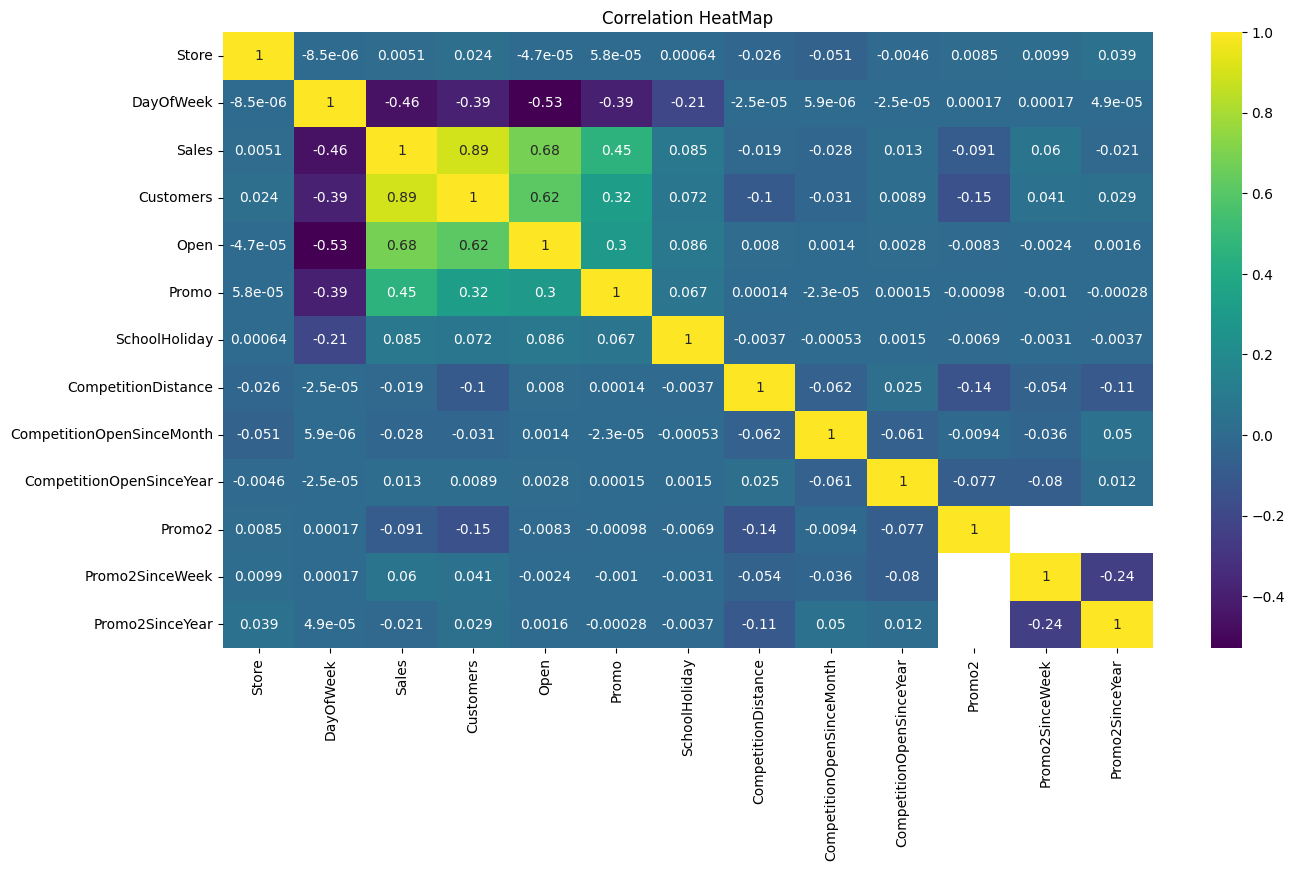

In [20]:
# Chart - 1 Correlation Heatmap visualization code

# Saving correlation in a variable using corr() function

corr = df.corr()

# Setting up larger plot size

plt.figure(figsize=(15,8))

# Plotting Heatmap

sns.heatmap(corr,cbar=True, annot=True,cmap='viridis')

# Setting title

plt.title("Correlation HeatMap")

##### 1. Why did you pick the specific chart?

Heatmaps use colors to represent values, making it easy to visually identify areas of high and low correlation. The use of a color scale allows us to quickly spot patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

1. Customers and Open columns have strong positive correlation with Sales column.
2. Open and DayOfWeek columns are negatively correlated with each other.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

The columns have positive correlation, it means the increase in one variable will also increase other variable. However, negative correlation means increase in one variable will lead to decrease in other variable. This relation helps the business to understand the important factors affecting the Sales(dependent feature).

#### Chart - 2 - Month wise Average Sales (Bivariate)

Text(0.5, 1.0, 'Month wise Average Sales')

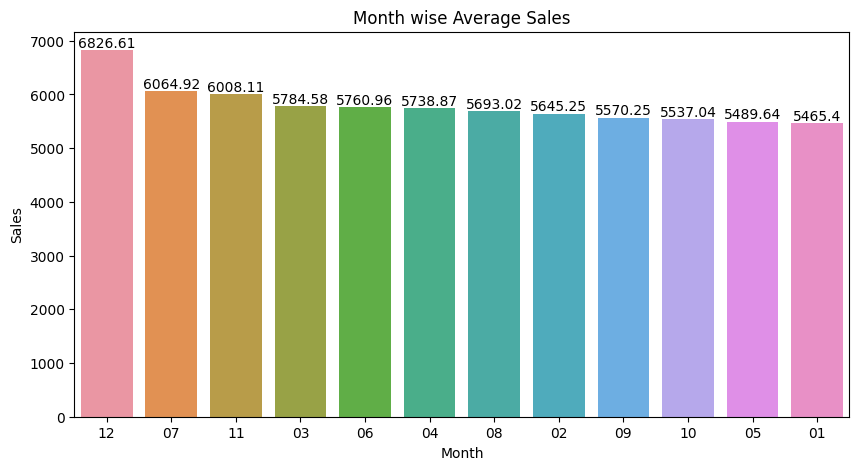

In [21]:
# Chart - 2 visualization code

# Setting plot size

plt.figure(figsize=(10,5))

# Creating a dataframe having Sorted Months and their respective sales

month_sales = df.groupby("Month")["Sales"].mean().reset_index().sort_values(by="Sales",ascending=False)

# Plotting bargraph:

# Creating instance and for loop to show respective values on the bars:

ms = sns.barplot(x=month_sales["Month"],y=month_sales["Sales"])

for value in ms.containers:
  ms.bar_label(value)

# Setting Title

plt.title("Month wise Average Sales")

##### 1. Why did you pick the specific chart?

Bar chart allows for easy comparison among different categories, making it possible to see patterns, trends, and relationships.

##### 2. What is/are the insight(s) found from the chart?

1. December Month is having the most average Sales.
2. Remaining all months do not have significant difference in sales.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

December (last month) of the year has the highest average sales indicating that this month has high opportunites of improving sales.

#### Chart - 3 - Year wise Average Sales (Bivariate)

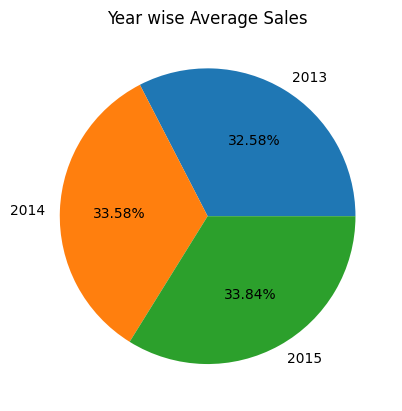

In [22]:
# Chart - 3 visualization code

# Creating a seperate dataframe containing year wise grouped average sales

year_sales = df.groupby("Year")["Sales"].mean().reset_index()

# Creating Pie Chart

plt.pie(x = year_sales["Sales"], data = year_sales,labels=year_sales["Year"],autopct="%.2f%%")

# setting up plot title
plt.title("Year wise Average Sales")
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are simple and intuitive, making them easy to understand even for people who are not familiar with data visualization.

##### 2. What is/are the insight(s) found from the chart?

Year 2015 has the highest average sales. All the years do not have significant difference in Average Sale.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

As the average sales for all the years are almost same, we can conclude that there was no specific aspect or factor which positively or negatively impacted the sales.

#### Chart - 4 - Promo vs Sales (Bivariate)

Text(0.5, 1.0, 'Promo vs Sales')

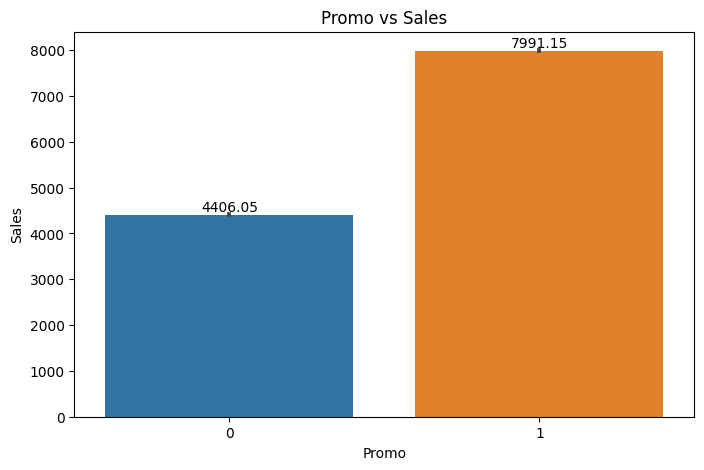

In [23]:
# Chart - 4 visualization code

# Setting up plot size

plt.figure(figsize=(8,5))

# Plotting bargraph:

# Creating instance and for loop to show respective values on the bars:

ds = sns.barplot(x=df["Promo"],y=df["Sales"])

for value in ds.containers:
  ds.bar_label(value)

# Setting Plot Title:

plt.title("Promo vs Sales")

##### 1. Why did you pick the specific chart?

Bar chart allows for easy comparison among different categories, making it possible to see patterns, trends, and relationships.

##### 2. What is/are the insight(s) found from the chart?

1. Sales are very higher when there was a Promotion(1) on the products compared to when there was no promotion(0).

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Knowing the affects of promotion on sales are crucial to attract more customer by running more and more different promotions to increase sales.

#### Chart - 5 - Weekday wise Frequency (Univariate)

Text(0.5, 1.0, 'Weekday Frequency')

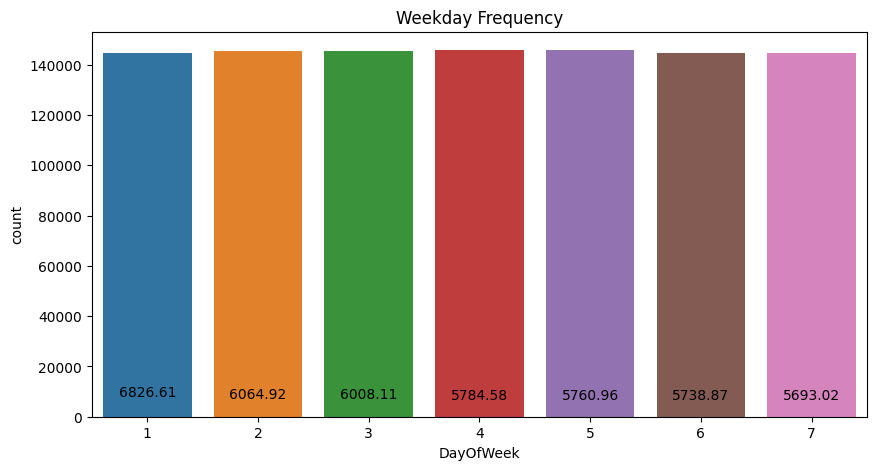

In [26]:
# Chart - 6 visualization code

# Setting up Plot Size

plt.figure(figsize=(10,5))

# Plotting bargraph:

# Creating instance and for loop to show respective values of the bars:

wd = sns.countplot(x=df["DayOfWeek"])

for value in ms.containers:
  wd.bar_label(value)

# Setting Title

plt.title("Weekday Frequency")

##### 1. Why did you pick the specific chart?

Countplots can be used to quickly compare the frequency of each category in the variable. This can be useful for identifying which categories are more common or less common in the data.

##### 2. What is/are the insight(s) found from the chart?

All of the Weekdays are not having much or significant difference in terms of total counts.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Having information on the specific weekday is crucial so more and more customers can be attracted by offerring different perks and offers.

#### Chart - 6 - Month Wise Total Customers (Bivariate)

Text(0.5, 1.0, 'Month Wise Total Customers')

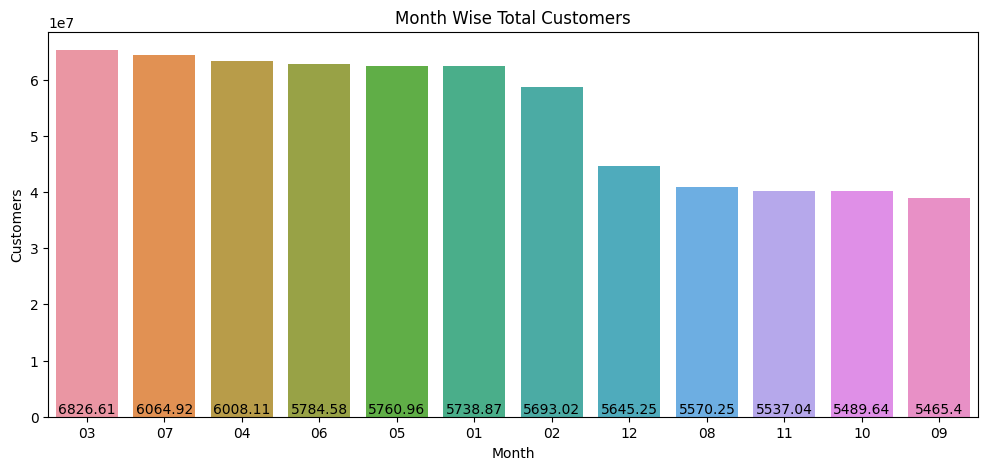

In [25]:
# Chart - 7 visualization code

# Setting up plot size

plt.figure(figsize=(12,5))

# Creating a seperate dataframe which will contain month wise total customer count

month_customer = df.groupby("Month")["Customers"].sum().reset_index().sort_values(by="Customers",ascending=False)

# Plotting bargraph:

# Creating instance and for loop to show respective values on the bars:

mc = sns.barplot(x=month_customer["Month"],y = month_customer["Customers"])

for value in ms.containers:
  mc.bar_label(value)

# Setting Plot Title:

plt.title("Month Wise Total Customers")

##### 1. Why did you pick the specific chart?

Bar Plots allows for easy visualization of categorical data. By showing the count of each category, it can help identify patterns or trends in the data.

##### 2. What is/are the insight(s) found from the chart?

1. 3rd Month has the highest total customers whereas 9th Month has lowest total customers.
2. It is surprising that despite 12th Month having highest Average Sales, is having very low total customers compared to other months.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Having information on months having different customer counts is important to have a glance on data that highest customer counts does not alwasy mean highest sales.

#### Chart - 7 - Store and Month wise Average Sales (Multivariate)

Text(0.5, 1.0, 'Store and Month wise Average Sales')

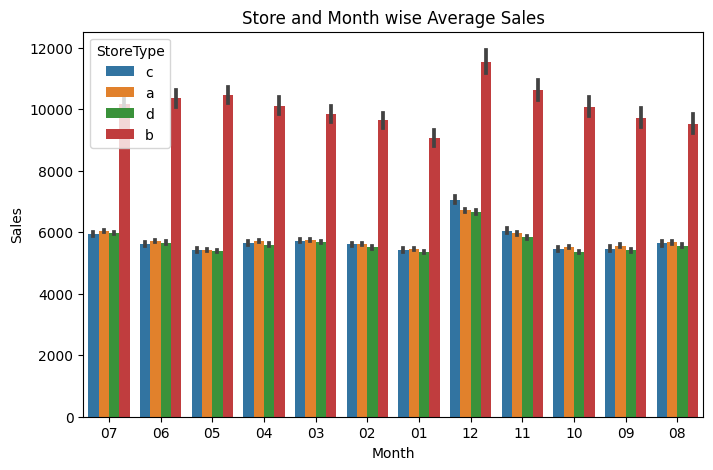

In [30]:
# Chart - 8 visualization code

# Setting up plot size

plt.figure(figsize=(8,5))

# Plotting graph

sns.barplot(x=df["Month"],y=df["Sales"],hue=df["StoreType"])

# Setting Title

plt.title("Store and Month wise Average Sales")

##### 1. Why did you pick the specific chart?

Bar chart allows for easy comparison among different categories, making it possible to see patterns, trends, and relationships.

##### 2. What is/are the insight(s) found from the chart?

1. In each of the month, Storetype b is having the highest average Sales.
2. Remaining StoreTypes are not having much difference in average Sales.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Analyzing Sales with respect to both StoreType and Month can help identify the effectiveness of different marketing strategies used by different types of stores.

#### Chart - 8 - Assortment and Storetype wise Average Sales (Multivariate)

In [31]:
df.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0      1          5   5263        555     1      1            0   
1      2          5   6064        625     1      1            0   
2      3          5   8314        821     1      1            0   
3      4          5  13995       1498     1      1            0   
4      5          5   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval Day Month  Year  
0              NaN              NaN              NaN  31    07  2015  
1             13.0           2010.0  Jan,Apr,Jul,Oct  31    07  2015  
2             14.0           2011.0  Jan,Apr,Jul,Oct  31    07  2015  
3              NaN              NaN              NaN  31    07  2015  
4              NaN              NaN              NaN  31    07  2015

In [32]:
df['Assortment'].value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

Text(0.5, 1.0, 'Assortment and Storetype wise Average Sales')

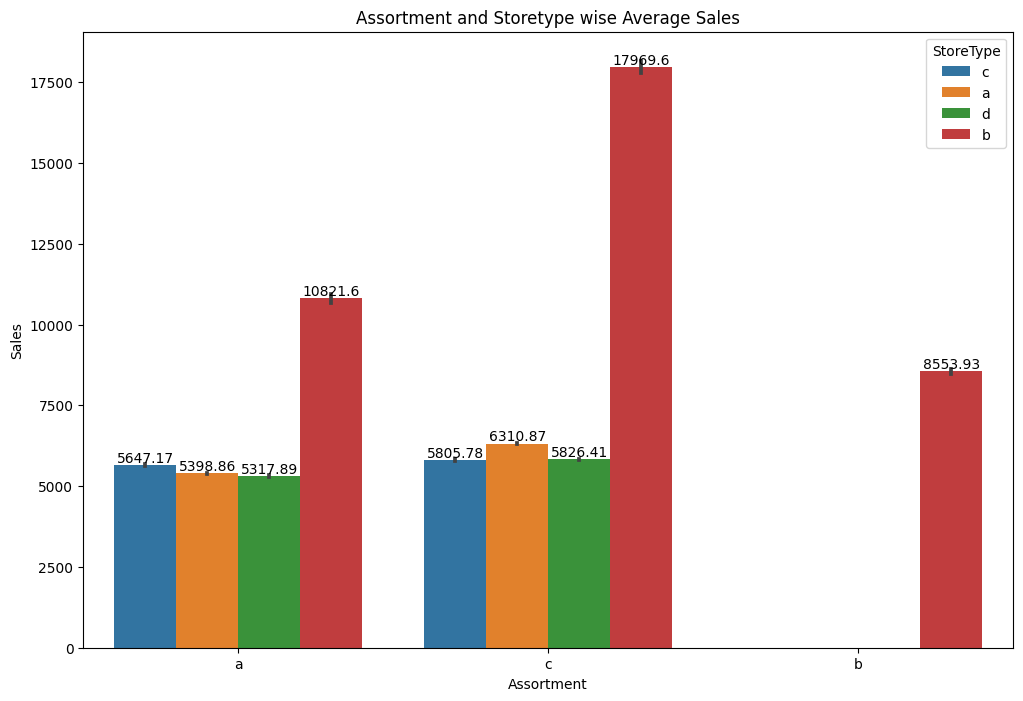

In [33]:
# Chart - 10 visualization code

# Setting plot size

plt.figure(figsize=(12,8))

# Plotting

ass = sns.barplot(x=df["Assortment"],y=df["Sales"],hue=df["StoreType"])

for item in ass.containers:
  ass.bar_label(item)

# Setting title

plt.title("Assortment and Storetype wise Average Sales")

##### 1. Why did you pick the specific chart?

Bar chart allows for easy comparison among different categories, making it possible to see patterns, trends, and relationships.

##### 2. What is/are the insight(s) found from the chart?

1. Assortment b only has one StoreType b which is having the highest sales for all the assortment types.
2. Assortment a and c have multiple StoreTypes among all, StoreType b has highest average sales.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

The assortment and store type can both impact the product offerings and customer experience of a store, which in turn can affect sales. By analyzing the average sales for each combination of assortment and store type, we can determine which combination is most effective in driving sales. This information can be used to optimize product offerings, store layouts, and marketing strategies to increase sales.

#### Chart - 9 - Assortment wise Average Sales (Bivariate)

Text(0.5, 1.0, 'Assortment wise Average Sales')

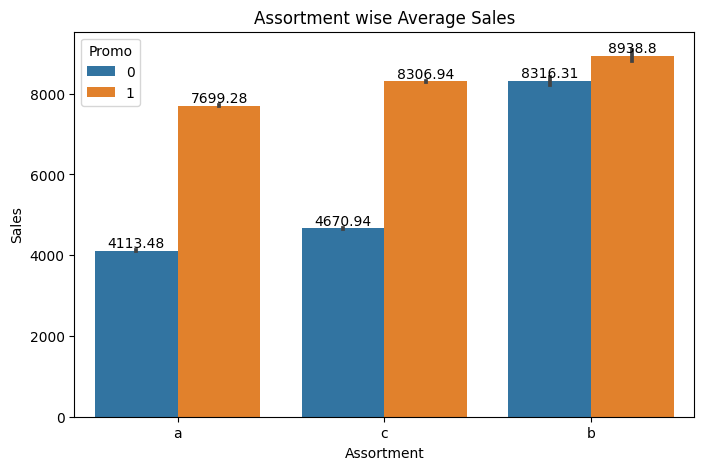

In [35]:
# Chart - 11 visualization code

# Setting plot size

plt.figure(figsize=(8,5))

# Plotting

ass = sns.barplot(x=df["Assortment"],y=df["Sales"], hue=df['Promo'])

for item in ass.containers:
  ass.bar_label(item)

# Setting title

plt.title("Assortment wise Average Sales")

##### 1. Why did you pick the specific chart?

Bar chart allows for easy comparison among different categories, making it possible to see patterns, trends, and relationships.

##### 2. What is/are the insight(s) found from the chart?

1. Assortment b has the highest average sales among all.
2. Among all the assortments, average sales are higher when Promo is active.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

The assortment and store type can both impact the product offerings and customer experience of a store, which in turn can affect sales. By analyzing the average sales for each combination of assortment and store type, we can determine which combination is most effective in driving sales. This information can be used to optimize product offerings, store layouts, and marketing strategies to increase sales.

#### Chart - 10 - Correlation Customers vs Sales (Bivariate)

Text(0.5, 1.0, 'Correlation Customers vs Sales')

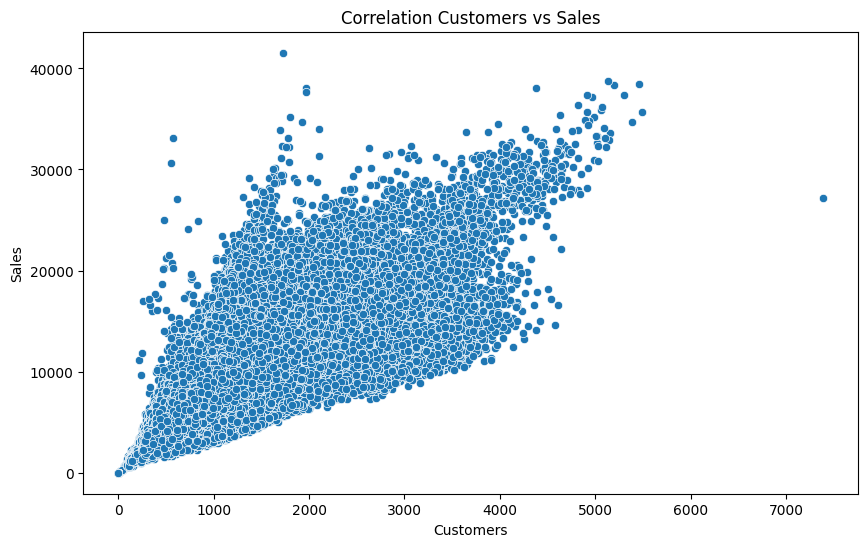

In [36]:
# Chart - 12 visualization code

# Setting plot size

plt.figure(figsize=(10,6))

# Creating plot

sns.scatterplot(x=df["Customers"],y=df["Sales"])

# Setting up title

plt.title("Correlation Customers vs Sales")

##### 1. Why did you pick the specific chart?

Scatter plots are important for visualizing the relationship between two continuous variables. They provide a quick and easy way to see whether there is a correlation or pattern between the two variables.

##### 2. What is/are the insight(s) found from the chart?

1. Customers and Sales are positively correlated with each other.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

If there is a positive correlation between the number of customers and sales, it suggests that as the number of customers increase, the sales also increase. This can be helpful for businesses to understand how to increase their sales by attracting more customers.

#### Chart - 11 - Sales Data Distribution (Univariate)

Text(0.5, 1.0, 'Sales Distribution')

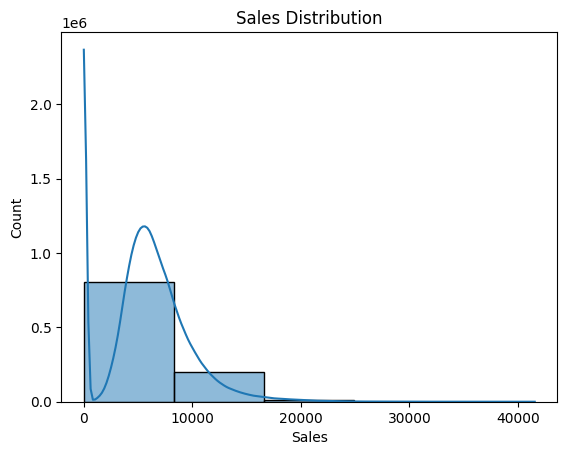

In [37]:
# Chart - 13 visualization code

sns.histplot(df["Sales"],kde=True,bins=5)

# Setting title

plt.title("Sales Distribution")

##### 1. Why did you pick the specific chart?

Histograms are an effective way to visualize the shape of a distribution, such as whether it is symmetric, skewed, bimodal, etc. This can help in identifying outliers, detecting patterns or trends, and understanding the underlying characteristics of the data.

##### 2. What is/are the insight(s) found from the chart?

Sales column data is not normally distributed. Also, it is skewed to right.

#### Chart - 12 - Customers Data Distribution Check (Univariate)

Text(0.5, 1.0, 'Customers Distribution')

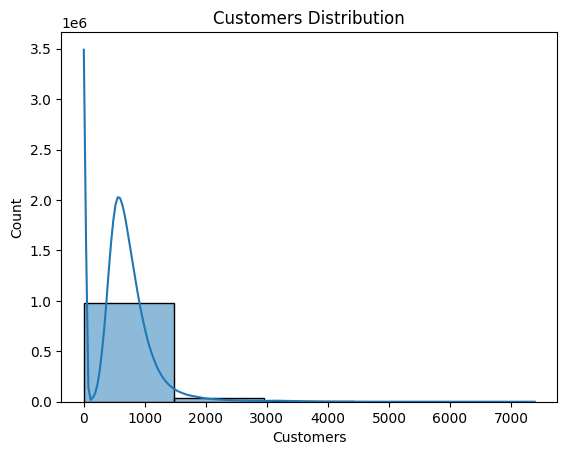

In [38]:
# Chart - 14 visualization code

sns.histplot(df["Customers"],kde=True,bins=5)

# Setting title

plt.title("Customers Distribution")

##### 1. Why did you pick the specific chart?

Histograms are an effective way to visualize the shape of a distribution, such as whether it is symmetric, skewed, bimodal, etc. This can help in identifying outliers, detecting patterns or trends, and understanding the underlying characteristics of the data.

##### 2. What is/are the insight(s) found from the chart?

Customers column data is not normally distributed and it is skewed to right similarly as Sales distribution.

##### 1. Why did you pick the specific chart?

Histograms are an effective way to visualize the shape of a distribution, such as whether it is symmetric, skewed, bimodal, etc. This can help in identifying outliers, detecting patterns or trends, and understanding the underlying characteristics of the data.

##### 2. What is/are the insight(s) found from the chart?

Data is not normally distributed.

#### Chart - 13 - Pair Plot

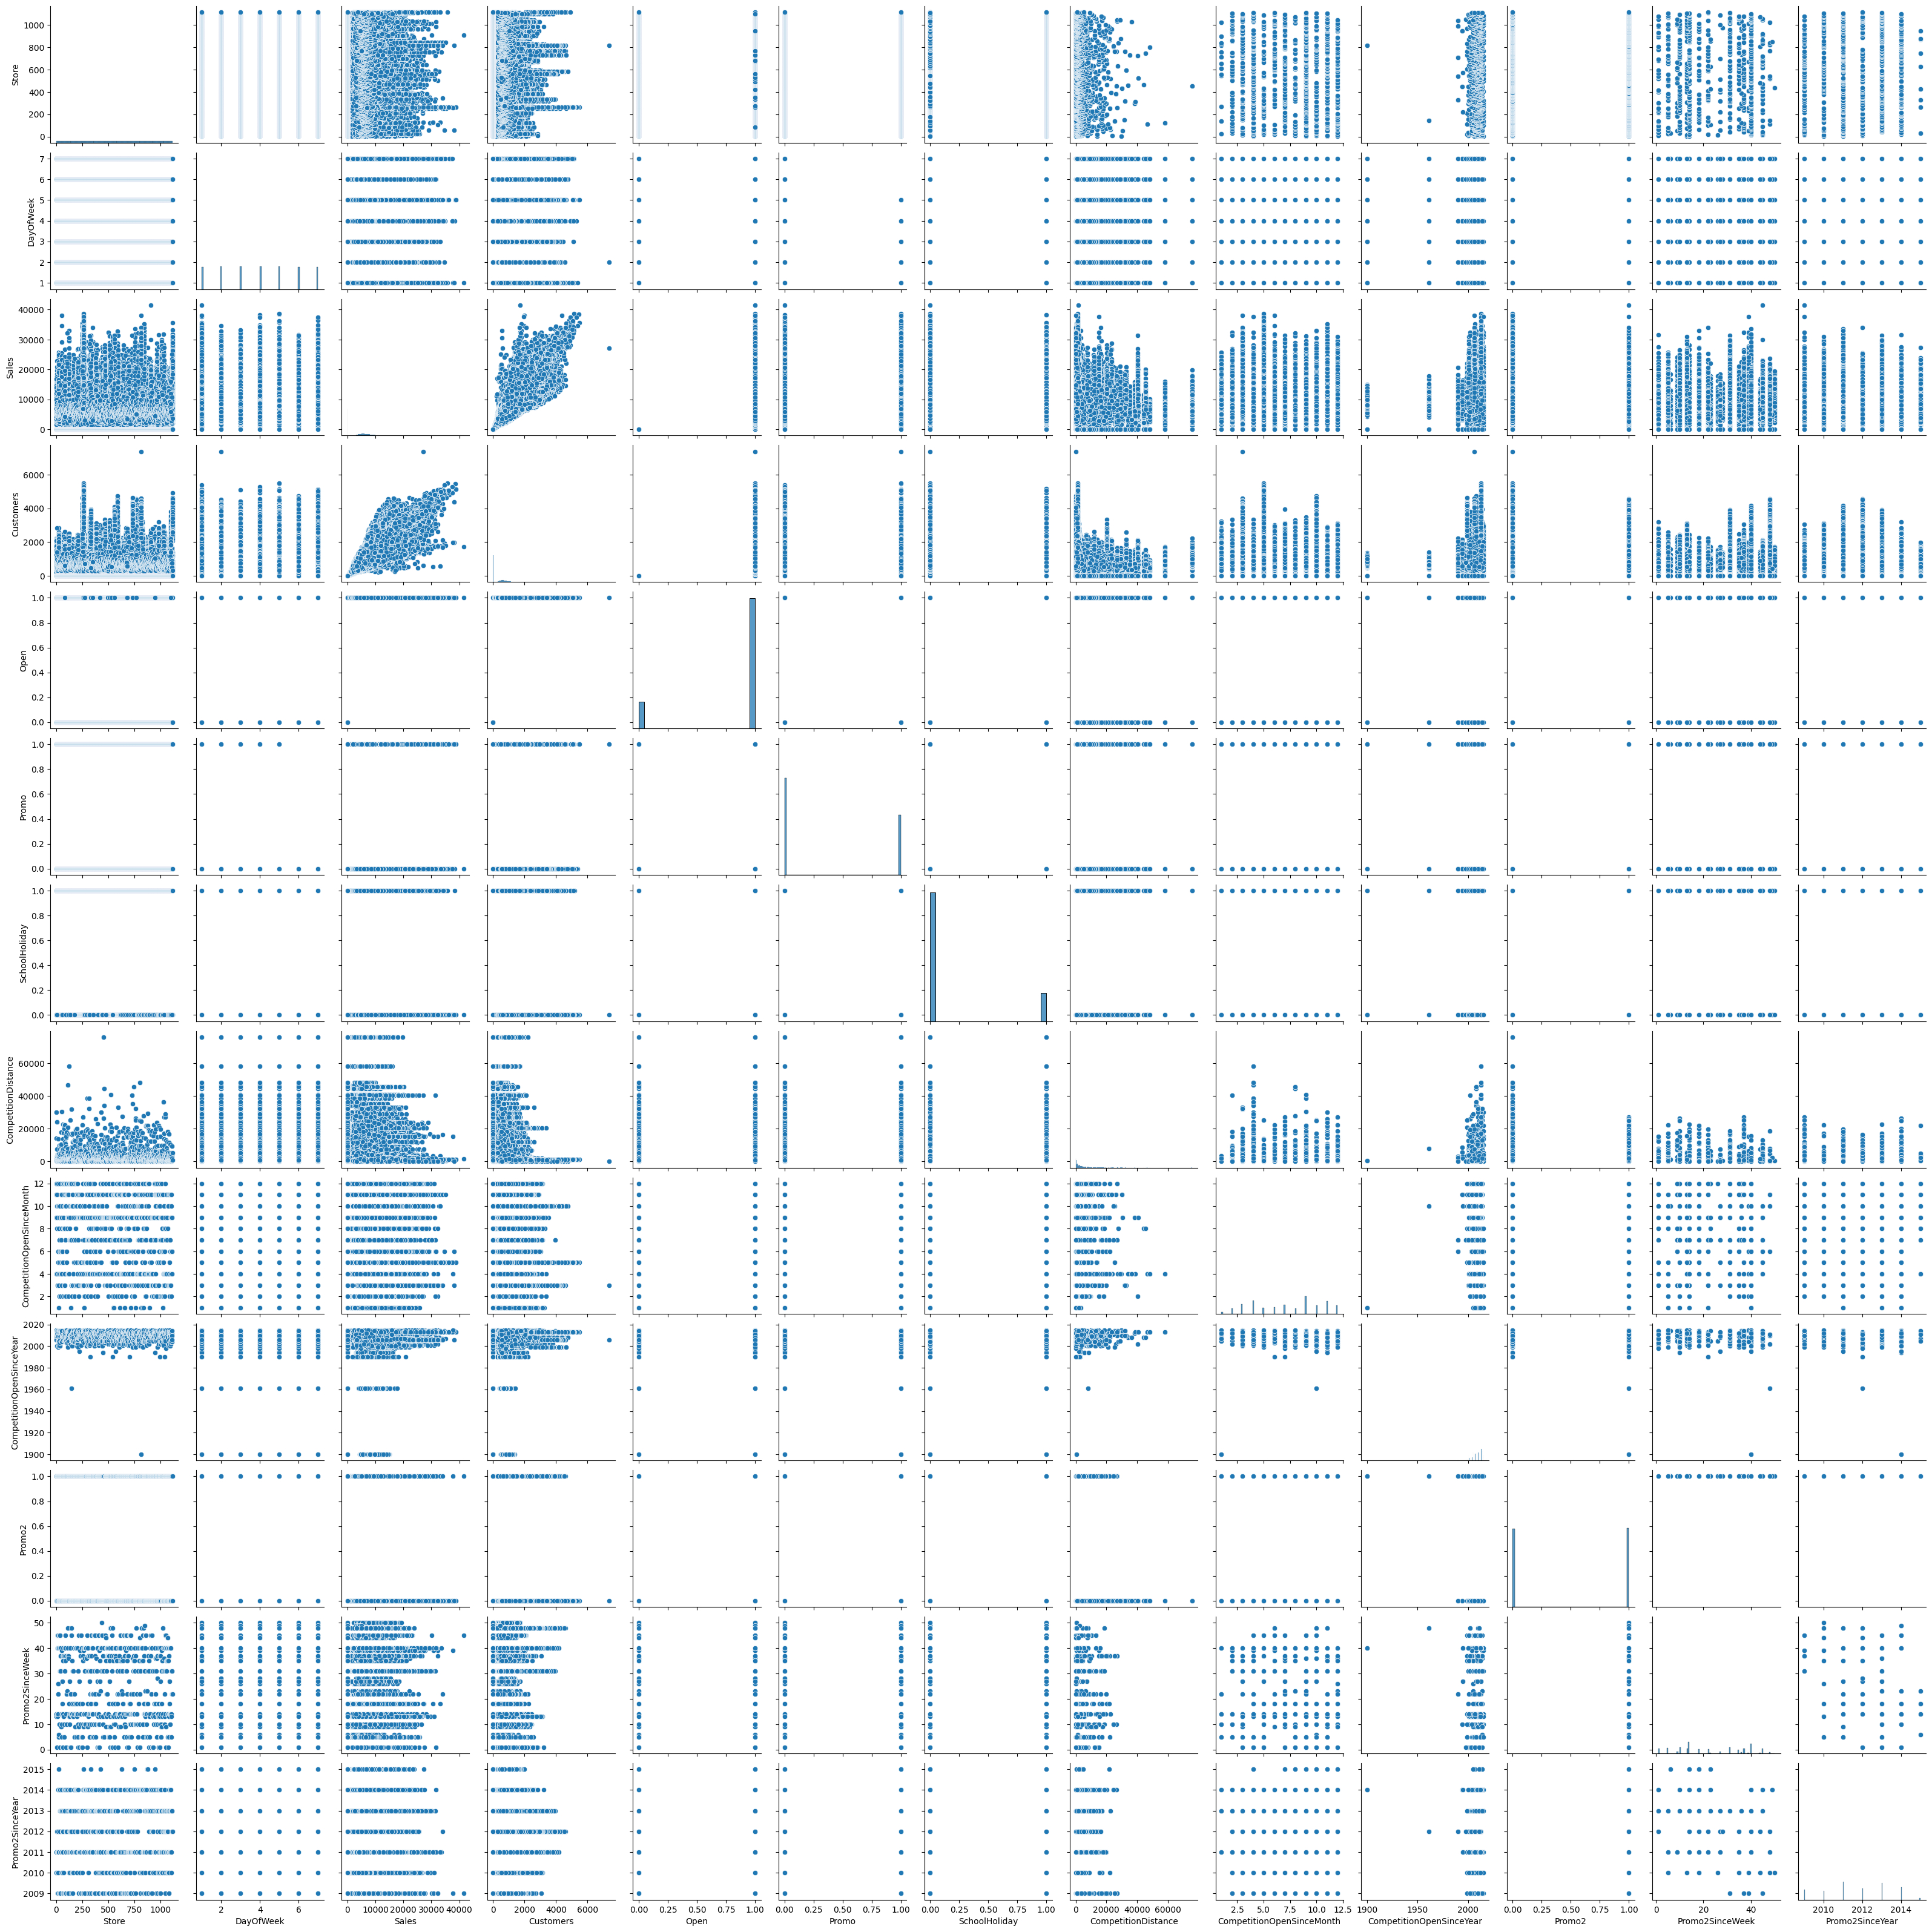

In [ ]:
# Pair Plot visualization code

sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Pairplot is an important tool in exploratory data analysis (EDA) because it allows for the visualization of pairwise relationships between multiple variables in a dataset. By creating scatterplots of every possible combination of two variables in a dataset, pairplot can help identify trends, patterns, and potential relationships between variables. It can also be used to detect outliers and to identify potential areas of interest for further analysis.

##### 2. What is/are the insight(s) found from the chart?

1. Sales and Customers are correlated with each other.
2. Most of the features do not have linear relationship with the dependent feature (Sales).

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

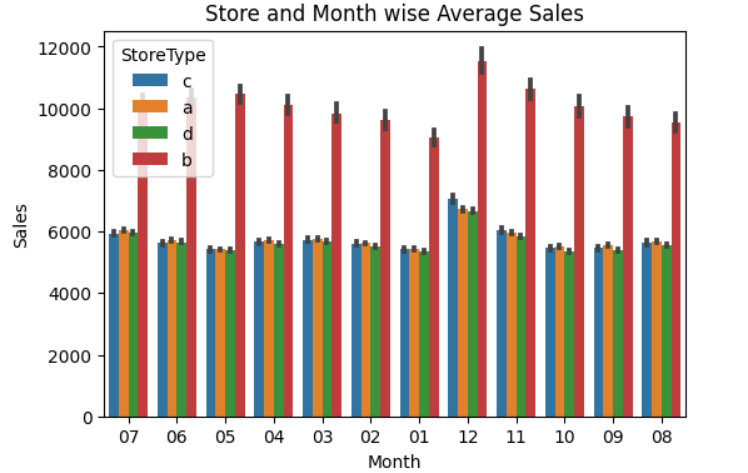

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Based on above observation that StoreType b has the most sales in each month compared to a, b and d, we can define:

**Null hypothesis (H0):** There is no significant difference in sales between StoreType b and the other StoreTypes (a, c, and d).

**Alternative hypothesis (Ha):** There is a significant difference in sales between StoreType b and the other StoreTypes (a, c, and d).

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value

# Importing required library to perform the One-Way Anova Test(f_test):

from scipy.stats import f_oneway

# Creating a seperate Series for StoreType b and other StoreType Sales.

b_sales = df[df["StoreType"] == "b"]["Sales"]
other_sales = df[df["StoreType"] != "b"]["Sales"]

# Performing the One-Way Anova Test:

f_value, p_value = f_oneway(b_sales, other_sales)

# defining significance level(alpha = 0.05):

alpha = 0.05

print(f'f_value is {f_value}')
print(f'p_value is {p_value}')

if p_value <= alpha:
  print("We reject the Null Hypothesis")
else:
  print("We fail to reject the Null Hypothesis")

f_value is 20318.049989053903
p_value is 0.0
We reject the Null Hypothesis


**Observation**:

1. We assumed in our Null Hypothesis that there is no significant difference in sales between StoreType b and the other StoreTypes (a, c, and d). However, as per the Hypothesis testing, we do not have enough evidence to support our Null Hypothesis meaning to reject it.

2. This leads to accept the Alternate Hypothesis that there is a difference between b and other storetype sales which we also observed from above chart.

##### Which statistical test have you done to obtain P-Value?

Test Applied - One-Way Anova Test.

##### Why did you choose the specific statistical test?

Applied One-Way Anova test as StoreType feature is categorical with more then 3 levels and Sales is a numerical feature. One-Way Anova test is used when there is only one independent Categorical feature with three or more levels and one Dependent feature. The purpose of this test is to determine whether there is a significant difference between the means of the groups.Answer Here.

### Hypothetical Statement - 2

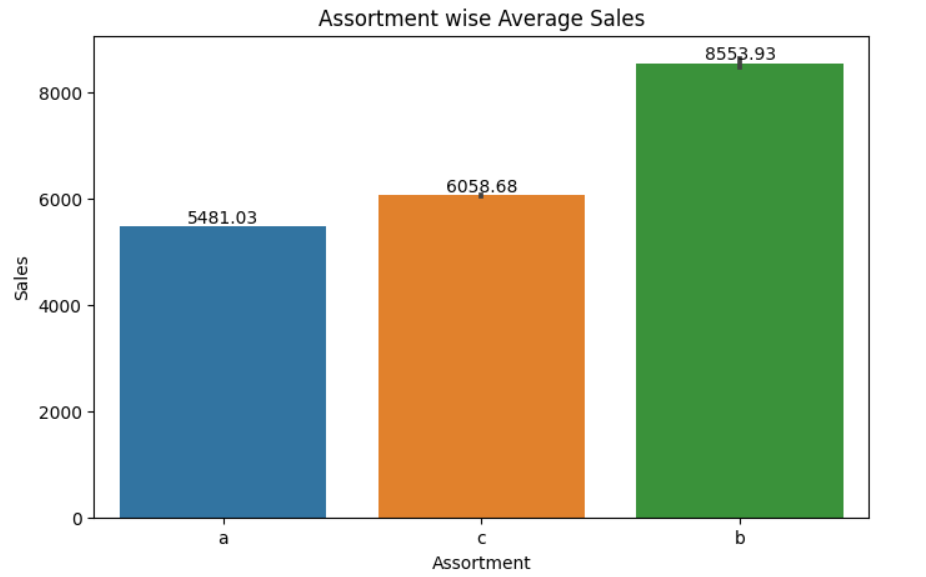

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Based on above observation that Assortment b has the most sales compared to a and c, we can define:

**Null hypothesis (H0):** There is no significant difference in sales between Assortment b and the other Assortments (a and c).

**Alternative hypothesis (Ha):** There is a significant difference in sales between Assortment b and the other Assortments (a and c).

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value

# Creating a seperate Series of Sales column values for assortment b and other assortments:

assortment_b = df[df["Assortment"]=="b"]["Sales"]
other_assortment = df[df["Assortment"]!="b"]["Sales"]

# Applying One-Way Annova test:

f_value, p_value = f_oneway(assortment_b,other_assortment)

# Defining significance level:

alpha = 0.05

# Printing result:

print(f'f_value is {f_value}')
print(f'p_value is {p_value}')

if p_value  <= alpha:
  print("We Reject the Null Hypothesis")
else:
  print("We Fail to reject the Null Hypothesis")

f_value is 4379.303484194232
p_value is 0.0
We Reject the Null Hypothesis


Observation:

We assumed in our Null Hypothesis that there is no significant difference in sales between Assortment b and the other Assortments (a and c). However, as per the Hypothesis testing, we do not have enough evidence to support our Null Hypothesis meaning to reject it.

This leads to accept the Alternate Hypothesis that there is a difference between Assortment b and the other Assortments which we also observed from above chart.

##### Which statistical test have you done to obtain P-Value?

Test Applied - One-Way Anova Test.

##### Why did you choose the specific statistical test?

Applied One-Way Anova test as Assortment feature is categorical with 3 levels and Sales is a numerical feature. One-Way Anova test is used when there is only one independent Categorical feature with three or more levels and one Dependent feature. The purpose of this test is to determine whether there is a significant difference between the means of the groups.Answer Here.

### Hypothetical Statement - 3

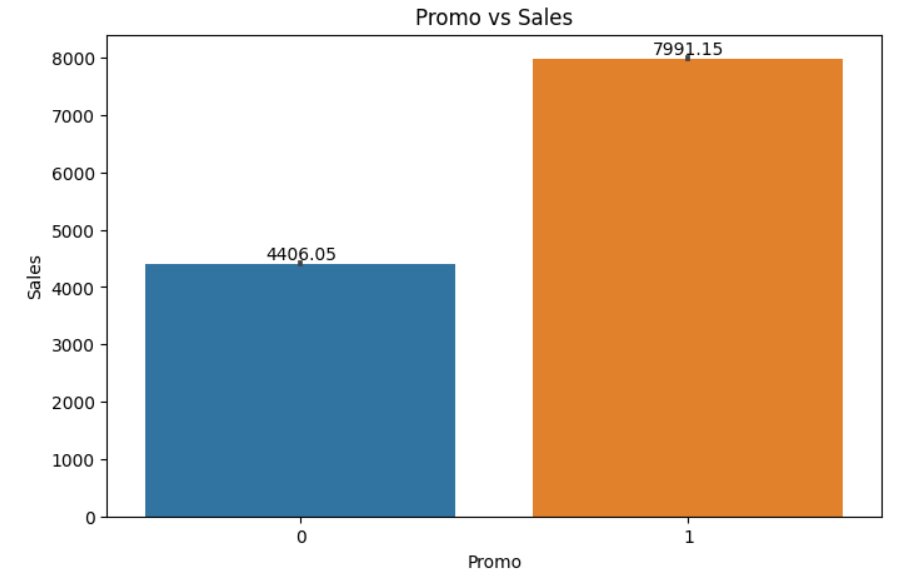

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Based on above observation that Sales were higher when there was a promotion, we can define:

**Null hypothesis (H0):** There is no significant difference in average sales  with and without promotions.

**Alternative hypothesis (Ha):** There is a significant difference in average sales with and without promotions.

Observation:

We assumed in our Null Hypothesis that there is no significant difference in average sales  with and without promotions. However, as per the Hypothesis testing, we do not have enough evidence to support our Null Hypothesis meaning to reject it.

This leads to accept the Alternate Hypothesis that there is a difference in average sales  with and without promotions which we also observed from above chart.

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value

# importing required library to perform t_test

from scipy.stats import ttest_ind

# Creating a seperate Series of Sales column values for 12th Month and other months:

no_promo = df[df["Promo"]==0]["Sales"]
yes_promo = df[df["Promo"]==1]["Sales"]

# Applying t_test:

t_statistics, p_value = ttest_ind(yes_promo,no_promo)

# Defining significance level:

alpha = 0.05

# Printing result:

print(f't_statistics is {t_statistics}')
print(f'p_value is {p_value}')

if p_value  <= alpha:
  print("We Reject the Null Hypothesis")
else:
  print("We Fail to reject the Null Hypothesis")

t_statistics is 511.54718673163774
p_value is 0.0
We Reject the Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

Test Applied - Two-Sample t_test

##### Why did you choose the specific statistical test?

When we have one categorical independent feature with 2 levels and one numerical dependent feature, we should choose 2_sample t_test to get t_test_statistics and p_value for hypothesis testing

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Retrieving columns with missing values:

df.isna().sum()[df.isna().sum()>0]

CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

Observation: CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear, PromoInterval columns have null values.

In [44]:
# Handling null values for CompetitionDance column:

df["CompetitionDistance"].fillna(df["CompetitionDistance"].median(),inplace=True)

In [47]:
# Handling null values for CompetitionOpenSinceMonth column:

df["CompetitionOpenSinceMonth"].fillna(np.mean(df["CompetitionOpenSinceMonth"]),inplace=True)

In [49]:
# Handling null values for CompetitionOpenSinceYear column:

df["CompetitionOpenSinceYear"].fillna(df["CompetitionOpenSinceYear"].median(),inplace=True)

In [50]:
# Handling null values for Promo2SinceWeek column:

df["Promo2SinceWeek"].fillna(np.mean(df["Promo2SinceWeek"]),inplace=True)

In [51]:
# Handling null values for Promo2SinceYear column:

df["Promo2SinceYear"].fillna(np.mean(df["Promo2SinceYear"]),inplace=True)

In [52]:
# Handling null values for PromoInterval column:

df["PromoInterval"].fillna(df["PromoInterval"].mode()[0],inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

1. Columns "CompetitionDance", "CompetitionOpenSinceYear" are numerical columns have a lot of outliers. Therefore, replaced the null values with Median as it is not affected by the outliers.

2. Columns "CompetitionOpenSinceMonth", "Promo2SinceWeek","Promo2SinceYear","PromoInterval" are also numerical columns but do not have outliers. Therefore, replaced the null values with Mean.

### 2. Handling Outliers

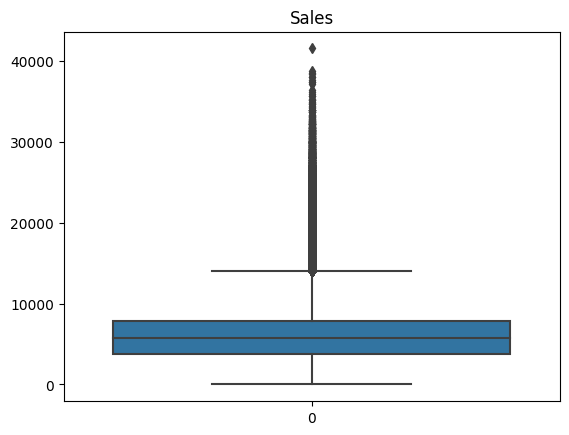

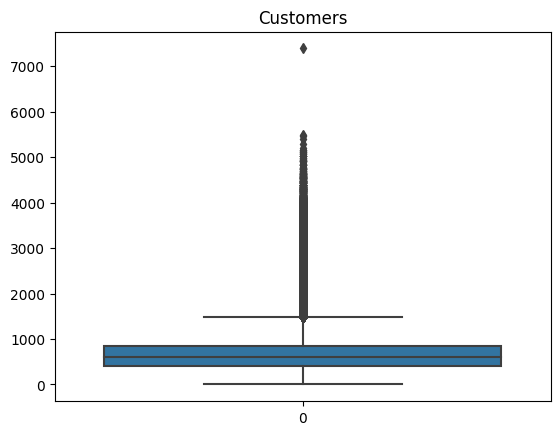

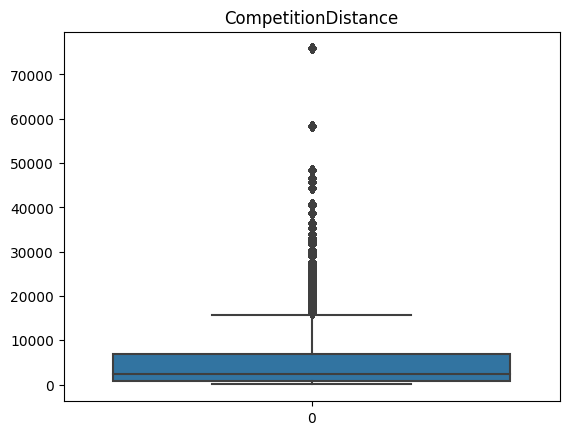

In [53]:
# creating a list of numerical columns from the dataframe:

num_columns = ["Sales", "Customers", "CompetitionDistance"]

# Creating boxplots for all the numerical columns:

for column in num_columns:
  sns.boxplot(df[column])
  plt.title(column)
  plt.show()

Observation: As we can see that all these 3 columns have outliers which may affect our model predictions.

In [54]:
# Creating a for loop to remove outliers from the numerical columns:

for column in num_columns:
  q1, q3 = np.percentile(df[column],[25,75])
  iqr = q3 - q1
  lower_limit = q1 - (1.5*iqr)
  upper_limit = q3 + (1.5*iqr)

  df[column] = df[column].apply(lambda x: np.nan if x< lower_limit or x>upper_limit else x)

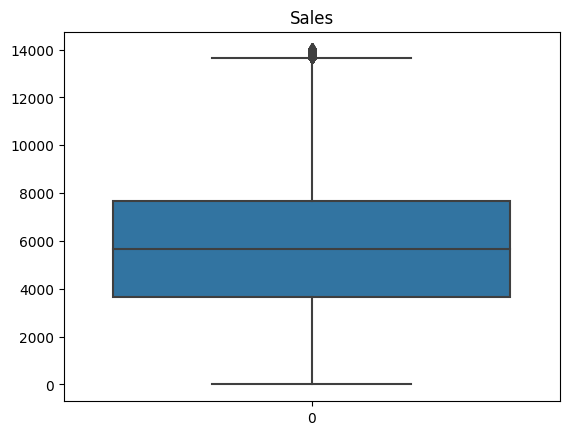

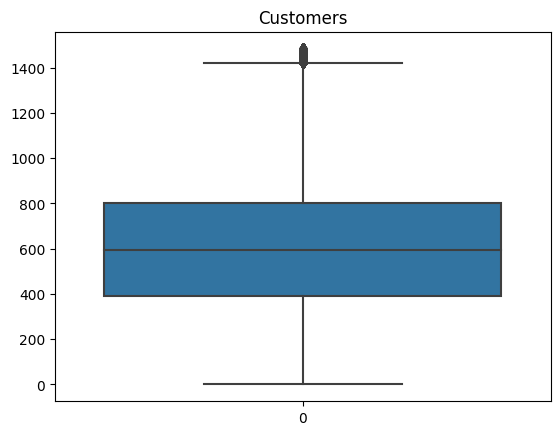

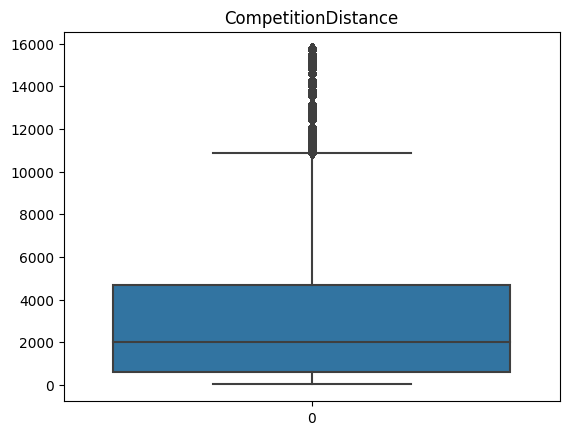

In [55]:
# Again checking the outliers in numerical columns:

for column in num_columns:
  sns.boxplot(df[column])
  plt.title(column)
  plt.show()

In [56]:
# Checking null values of numerical columns caused by outliers removal:

df[num_columns].isna().sum()

Sales                  26694
Customers              38095
CompetitionDistance    99160
dtype: int64

In [57]:
# Filling null values with median as still some outliers are present as per above boxplots:

df["Sales"].fillna(df["Sales"].median(),inplace=True)

df["Customers"].fillna(df["Customers"].median(),inplace=True)

df["CompetitionDistance"].fillna(df["CompetitionDistance"].median(),inplace=True)

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Technique used:** Interquartile range (IQR) method

**Reason:** Used this technique as the Interquartile range (IQR) method is a robust method to detect and remove outliers from a dataset. It is useful when the data has a non-normal distribution and contains extreme values or outliers. The IQR method calculates the range between the first quartile (Q1) and third quartile (Q3) of the data, and then identifies outliers as any data points outside of the range.

### 3. Categorical Encoding

In [60]:
# importing LabelEncoder and creating an object for the same:

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

# Encoding the PromoInterval column

df["PromoInterval"] = label.fit_transform(df["PromoInterval"])

In [63]:
# creating dummy variables for storetype and assortment features with non-ordinal data:

df = pd.get_dummies(df, columns=["StoreType","Assortment"], drop_first = True)

In [64]:
# Checking StateHoliday column unique values:

df["StateHoliday"].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [66]:
# Replacing StateHoliday stringtype "0" values with 0:

df["StateHoliday"].replace("0",0,inplace=True)

# Replacing StateHoliday types a,b and c with 1 indicating that there was a holiday on the day:

df["StateHoliday"].replace("a",1,inplace=True)
df["StateHoliday"].replace("b",1,inplace=True)
df["StateHoliday"].replace("c",1,inplace=True)

In [67]:
df['StateHoliday'].value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

In [70]:
# creating dummy variables for the StateHoliday feature:

df = pd.get_dummies(df, columns=["StateHoliday"],drop_first=True)

In [71]:
# Checking the object data types columns:

df.select_dtypes(include="object").columns

Index(['Day', 'Month', 'Year'], dtype='object')

In [72]:
# Converting the object datatype to integer:

df[['Day', 'Month', 'Year']] = df[['Day', 'Month', 'Year']].astype(int)

#### What all categorical encoding techniques have you used & why did you use those techniques?

**Techique used:** Label and OneHotEncoding

**Reason:** Label encoding is useful because it converts ordinal type of categorical data into numerical format, which is required for most machine learning algorithms to work. In label encoding, each category is assigned a unique numerical value, which enables the machine learning algorithms to use this data in their calculations. This helps in improving the accuracy of the model. OneHotEncoding is useful when non ordinal type of categorical values need to be converted to integer for model training.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

As this dataset does not have columns with large text values, Textual Data Preprocessing is not required.

### 5. Feature Manipulation & Selection

#### 1. Feature Selection for numerical columns

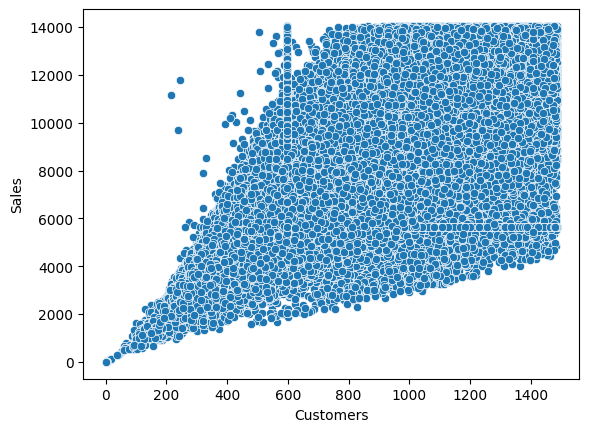

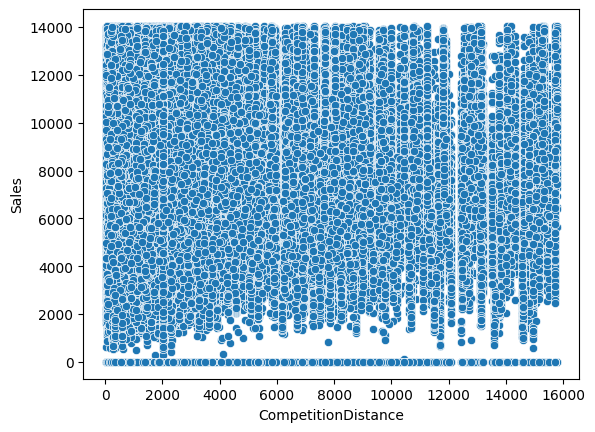

In [74]:
# Manipulating Features to minimize feature correlation and create new features

for item in ['Customers','CompetitionDistance']:
  sns.scatterplot(x=df[item],y=df["Sales"])
  plt.show()

In [75]:
# Dropping CompetitionDistance column as it does not have correlation with Sales column:

df.drop(["CompetitionDistance"],axis=1,inplace=True)

#####Which all features you found important and why?

Found Customers feature important as it has good correlation with Sales feature as per above scatterplots.

#### 2. Feature Selection for Categorical features

In [76]:
# performing ANOVA test to retrieve f_score for categorical feature selection:

# creating a seperate dataframe for only categorical features:

categorical_features = df.drop(["Customers","Sales"],axis=1)
target_feature = df["Sales"]

# Performing feature selection using f_regression
f_scores, p_values = f_regression(categorical_features, df['Sales'])

# Creating a DataFrame to store the feature scores and p-values
result_df = pd.DataFrame({'Feature': categorical_features.columns, 'F-Score': f_scores, 'P-Value': p_values})

# Sorting the DataFrame by p-value in ascending order
result_df.sort_values('F-Score', inplace=True, ascending=False)

# Printing the sorted DataFrame
result_df

Feature       F-Score        P-Value
2                        Open  1.265471e+06   0.000000e+00
1                   DayOfWeek  3.097826e+05   0.000000e+00
3                       Promo  2.743087e+05   0.000000e+00
19             StateHoliday_1  8.763661e+04   0.000000e+00
4               SchoolHoliday  7.838870e+03   0.000000e+00
14                StoreType_b  5.715971e+03   0.000000e+00
7                      Promo2  3.799044e+03   0.000000e+00
18               Assortment_c  3.494077e+03   0.000000e+00
17               Assortment_b  3.144532e+03   0.000000e+00
8             Promo2SinceWeek  1.254401e+03  1.350945e-274
12                      Month  1.180898e+03  1.218194e-258
13                       Year  7.556184e+02  2.772236e-166
5   CompetitionOpenSinceMonth  2.091988e+02   2.076694e-47
9             Promo2SinceYear  1.482331e+02   4.241887e-34
11                        Day  1.024905e+02   4.345789e-24
10              PromoInterval  5.770018e+01   3.055331e-14
16                StoreType_d  5.749348e+01   3.393871e-14
6    CompetitionOpenSinceYear  3.152762e+01   1.966740e-08
15                StoreType_c  3.463940e+00   6.272097e-02
0                       Store  4.953317e-02   8.238776e-01

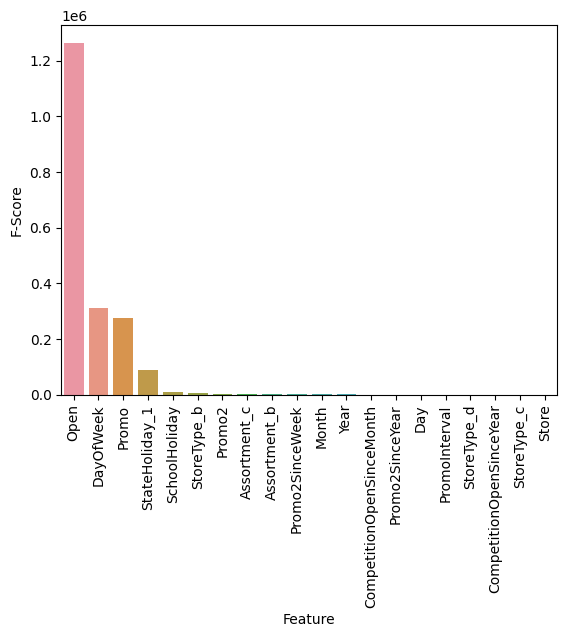

In [77]:
# Plotting the chi_values on bar-graph:

sns.barplot(x=result_df["Feature"],y=result_df["F-Score"])
plt.xticks(rotation=90)
plt.show()

In [80]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c', 'StateHoliday_1'],
      dtype='object')

Observation: As per above barplot, the features with more F_score are more important in model training and predictions.

In [92]:
# Keeping only required columns which have high f-score:

df_new = df[["Open", "DayOfWeek", "Promo", "StateHoliday_1", "SchoolHoliday", "StoreType_b", "StoreType_c", "StoreType_d", "Assortment_b", "Assortment_c", "Customers","Sales"]]

In [93]:
# Renaming StateHoliday_1 to StateHoliday:

df_new.rename(columns={"StateHoliday_1": "StateHoliday"}, inplace=True)

<ipython-input-93-1beb23801ca0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rename(columns={"StateHoliday_1": "StateHoliday"}, inplace=True)


##### What all feature selection methods have you used  and why?

1. For numerical columns, used correlation method and removed features are not correlated with the target featured.

2. For categorical feature, performed ANOVA  test and through f_values, removed insignificant features with less scores.

##### Which all features you found important and why?

*Found* Store ["Open", "Customers", "DayOfWeek", "Promo", "StateHoliday_1", "SchoolHoliday", "StoreType_b", "StoreType_c", "StoreType_d", "Assortment_b", "Assortment_c"]  features important as these features have high chi_score compared to other categorical features which will help in better predictions for unseen data.

### 6. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [94]:
# Transform Your data

# Creating a new dataframe with dummy columns for categorical features:

df_final = pd.get_dummies(df_new,columns=["DayOfWeek"])

In [95]:
# new dataframe view:

df_final.head()

Open  Promo  StateHoliday  SchoolHoliday  StoreType_b  StoreType_c  \
0     1      1             0              1            0            1   
1     1      1             0              1            0            0   
2     1      1             0              1            0            0   
3     1      1             0              1            0            1   
4     1      1             0              1            0            0   

   StoreType_d  Assortment_b  Assortment_c  Customers    Sales  DayOfWeek_1  \
0            0             0             0      555.0   5263.0            0   
1            0             0             0      625.0   6064.0            0   
2            0             0             0      821.0   8314.0            0   
3            0             0             1      596.0  13995.0            0   
4            0             0             0      559.0   4822.0            0   

   DayOfWeek_2  DayOfWeek_3  DayOfWeek_4  DayOfWeek_5  DayOfWeek_6  \
0            0            0            0            1            0   
1            0            0            0            1            0   
2            0            0            0            1            0   
3            0            0            0            1            0   
4            0            0            0            1            0   

   DayOfWeek_7  
0            0  
1            0  
2            0  
3            0  
4            0

Performed OneHotEncoding through pd.get_dummies() as dataset have ordinal feature as DayOfWeek which represents to categorical values.

### 7. Data Splitting

In [96]:
# Creating seperate dataframes for independent and dependent features:

X = df_new.drop(["Sales"],axis=1)
y = df_new["Sales"]

In [97]:
# Spliting the data to train and test:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)

##### What data splitting ratio have you used and why?

Used 75/25 percent ratio for train and test dataset as the train data is huge, it would be perfect for training the model and will be having more data to test on.

### 8. Data Scaling

Data Scaling is not required as final dataset has only one numerical feature. Remaining all features are categorical nature.

### 9. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimesionality Reduction is not required as final dataframe does not have too many features which may cause the model to overfit.

### 10. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Handling Imbalanced Dataset is not applicable in regression problem.

## ***7. ML Model Implementation***

### ML Model - 1 - Linear Regression

#### 1. Import Linear Regression Class

In [99]:
# ML Model - 1 Implementation

# Creating instance for LinearRegression:

linear = LinearRegression()

# Obtaining different mean squared errors using k-fold cross validation:

mse = cross_val_score(linear,X,y,scoring="neg_mean_squared_error",cv=5)

# creating variable for all mean squared errors mean:

mse_mean = np.mean(mse)

# printing

mse_mean

-2047550.5386154987

#### 2. Cross- Validation

Hyperparameter tuning is not done in Linear Regression model as no hyperparameter is available.

##### Which hyperparameter optimization technique have you used and why?

Hyperparameter tuning is not done in Linear Regression model as no hyperparameter is available.

#### 3. Train the Model

In [100]:
# performing fit:

linear.fit(X_train, y_train)

LinearRegression()

#### 4. Test the Model

In [101]:
# predicting and storing the sales values for test data:

y_pred = linear.predict(X_test)

# storing r2_score for this prediction:

linear_r2 = r2_score(y_test,y_pred)

# mean squared error:

linear_mse = mean_squared_error(y_test,y_pred)

# printing the results:

print(f'r2_score is {linear_r2}')
print(f'mean squared error is {linear_mse}')

r2_score is 0.8150050724202089
mean squared error is 2042270.6646381756


#### 5. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Explanation**: Linear regression is a popular and widely used regression model that assumes a linear relationship between the independent variables (predictors) and the dependent variable (response). It models the relationship as a straight line that best fits the data.

After Hyperparameter Tuning, Linear Model is giving same good predictions with the accuracy of almost **81%** and Mean Squared Error of near **1947320** which means the model is not overfit to the training data.

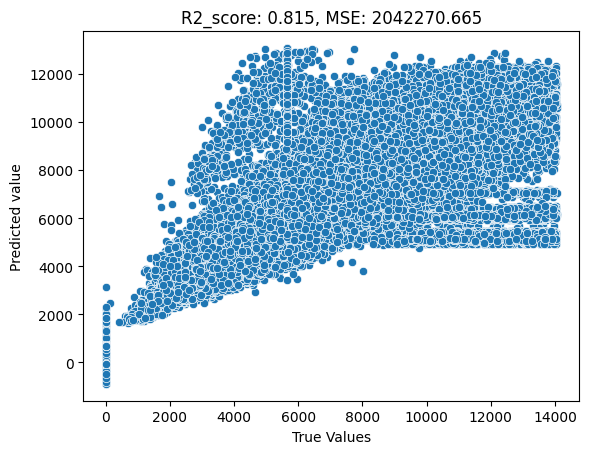

In [102]:
# Visualizing evaluation Metric Score chart

sns.scatterplot(x=y_test,y=y_pred)
plt.title(f'R2_score: {linear_r2:.3f}, MSE: {linear_mse:.3f}')
plt.xlabel("True Values")
plt.ylabel("Predicted value")
plt.show()

### ML Model - 2 - Ridge Regression

In [103]:
# ML Model - 2 Implementation

# Creating instance for RidgeRegression:

ridge = Ridge()

# Fitting the model:

ridge.fit(X_train, y_train)

# Calculating r2_score on test data:

r2_score(y_test, ridge.predict(X_test))

0.8150050890303999

In [104]:
# Calculate the R-squared score
r2 = r2_score(y_test, ridge.predict(X_test))

# Get the number of predictors (features)
num_predictors = X.shape[1]

# Calculate the number of samples
num_samples = len(y_test)

# Calculate the adjusted R-squared score
adjusted_r2 = 1 - (1 - r2) * ((num_samples - 1) / (num_samples - num_predictors - 1))

#printing adjusted_r2:

adjusted_r2

0.814997086607897

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The Ridge Regression Model is giving the R2_Score and adjusted_r2 of 81% before hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [105]:
# Defining hyperparameter values for lambda(alpha) for ridge regression:

parameters = {'alpha':[0.01, 0.1, 1]}

# Performing Hyperparameter Tuning with GridSearchCV:

ridgecv = GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error",cv=5)

##### Which hyperparameter optimization technique have you used and why?

Used GridSearchCV for hyperparameter tuning as it performs an exhaustive search over specified parameter values for a given estimator. It systematically works through multiple combinations of parameter values, fitting the estimator on each combination and returning the combination that gives the best performance according to a scoring function.

#### 3. Train the Model

In [106]:
# Train the model:

ridgecv.fit(X_train, y_train)

ridgecv.best_params_

{'alpha': 1}

#### 4. Test the Model

In [107]:
# predicting and storing the sales values for test data:

ridge_y_pred = ridgecv.predict(X_test)

# storing r2_score for this prediction:

ridge_r2 = r2_score(y_test,ridge_y_pred)

# mean squared error:

ridge_mse = mean_squared_error(y_test,ridge_y_pred)

# printing the results:

print(f'r2_score is {ridge_r2}')
print(f'mean squared error is {ridge_mse}')
print(f'adjusted_r2 is {1 - (1 - ridge_r2) * ((num_samples - 1) / (num_samples - num_predictors - 1))}')

r2_score is 0.8150050890303999
mean squared error is 2042270.4812682525
adjusted_r2 is 0.814997086607897


#### 5. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Explanation:** Ridge regression is a regularization technique used in linear regression to prevent overfitting. It adds a penalty term to the loss function that constrains the coefficients, shrinking them towards zero. This helps to reduce the impact of irrelevant features and improves model stability, at the cost of introducing some bias.

After Hyperparameter Tuning, Ridge Regression Model is similar giving good predictions with the accuracy of almost 81% and Mean Squared Error of near 1947320 which means the model is not overfit to the training data.

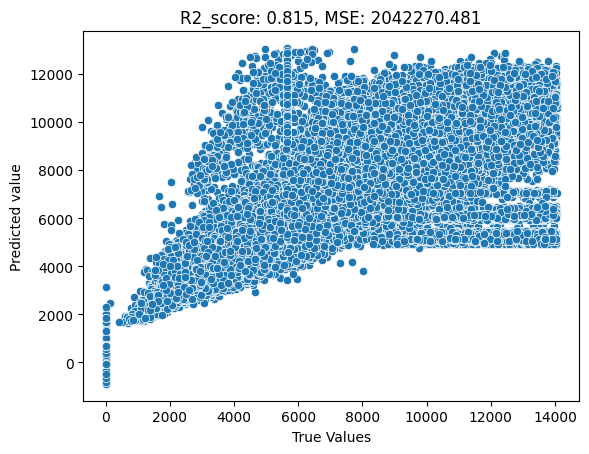

In [108]:
# Visualizing evaluation Metric Score chart

sns.scatterplot(x=y_test,y=ridge_y_pred)
plt.title(f'R2_score: {ridge_r2:.3f}, MSE: {ridge_mse:.3f}')
plt.xlabel("True Values")
plt.ylabel("Predicted value")
plt.show()

### ML Model - 3 - Lasso Regression

#### 1. Import Lasso Regression Class

In [109]:
# ML Model - 3 Implementation

# Creating instance for RidgeRegression:

lasso = Lasso()

# Fitting the model:

lasso.fit(X_train, y_train)

# Calculating r2_score on test data:

r2_score(y_test, lasso.predict(X_test))

0.8149887003580939

In [110]:
# Calculating the R-squared score
r2_lasso = r2_score(y_test, lasso.predict(X_test))

# Calculating the adjusted R-squared score
lasso_adjusted_r2 = 1 - (1 - r2_lasso) * ((num_samples - 1) / (num_samples - num_predictors - 1))

# Printing adjusted_r2:

lasso_adjusted_r2

0.8149806972266577

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The Lasso Regression Model is giving the R2_Score and adjusted_r2 of 81% before hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [111]:
# Defining hyperparameter values for lambda(alpha) for ridge regression:

parameters = {'alpha':[0.01, 0.1, 1]}

# Performing Hyperparameter Tuning with GridSearchCV:

lassocv = GridSearchCV(lasso,parameters,scoring="neg_mean_squared_error",cv=3)

##### Which hyperparameter optimization technique have you used and why?

Used GridSearchCV for hyperparameter tuning as it performs an exhaustive search over specified parameter values for a given estimator. It systematically works through multiple combinations of parameter values, fitting the estimator on each combination and returning the combination that gives the best performance according to a scoring function.

#### 3. Train the Model

In [112]:
# Train the model:

lassocv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(), param_grid={'alpha': [0.01, 0.1, 1]},
             scoring='neg_mean_squared_error')

#### 4. Test the Model

In [113]:
# predicting and storing the sales values for test data:

lasso_y_pred = lassocv.predict(X_test)

# storing r2_score for this prediction:

lasso_r2 = r2_score(y_test,lasso_y_pred)

# mean squared error:

lasso_mse = mean_squared_error(y_test,lasso_y_pred)

# printing the results:

print(f'r2_score is {lasso_r2}')
print(f'mean squared error is {lasso_mse}')
print(f'adjusted_r2 is {1 - (1 - lasso_r2) * ((num_samples - 1) / (num_samples - num_predictors - 1))}')

r2_score is 0.815005007871189
mean squared error is 2042271.377233767
adjusted_r2 is 0.8149970054451754


#### 5. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Explanation**: Lasso regression is another regularization technique used in linear regression. Similar to ridge regression, it adds a penalty term to the loss function, but in this case, it uses the absolute value of the coefficients. Lasso regression encourages sparsity by forcing some coefficients to become exactly zero, effectively performing feature selection. It is particularly useful when dealing with high-dimensional datasets and can help identify the most relevant features for the model.

After Hyperparameter Tuning, Lasso Regression Model is giving same good predictions with the accuracy of almost 81% and Mean Squared Error of near 1947320 which means the model is not overfit to the training data.

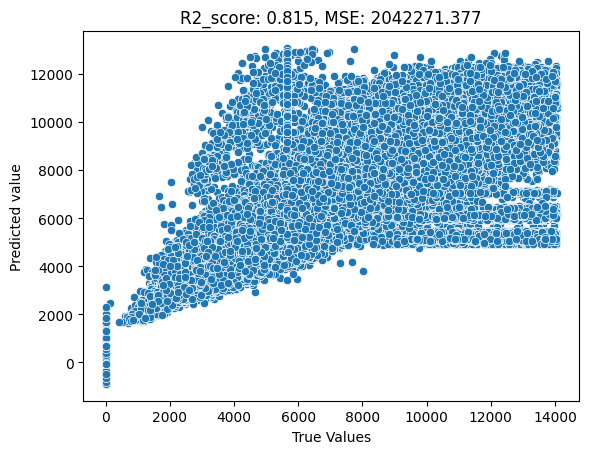

In [114]:
# Visualizing evaluation Metric Score chart

sns.scatterplot(x=y_test,y=lasso_y_pred)
plt.title(f'R2_score: {lasso_r2:.3f}, MSE: {lasso_mse:.3f}')
plt.xlabel("True Values")
plt.ylabel("Predicted value")
plt.show()

### ML Model - 4 - ElasticNet Regression

#### 1. Import ElasticNet Regression Class

In [115]:
# ML Model - 4 Implementation

# Creating instance for RidgeRegression:

elastic = ElasticNet()

# Fitting the model:

elastic.fit(X_train, y_train)

# Calculating r2_score on test data:

r2_score(y_test, elastic.predict(X_test))

0.7884830811765691

In [116]:
# Calculating the R-squared score
r2_elastic = r2_score(y_test, elastic.predict(X_test))

# Calculating the adjusted R-squared score
elastic_adjusted_r2 = 1 - (1 - r2_elastic) * ((num_samples - 1) / (num_samples - num_predictors - 1))

# Printing adjusted_r2:

elastic_adjusted_r2

0.7884739314775744

The ElasticNet Regression Model is giving comparitively less R2_Score and adjusted_r2 of 78% before hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [117]:
# Defining hyperparameter values for lambda(alpha) for ridge regression:

parameters = {'alpha':[0.01, 0.1, 1]}

# Performing Hyperparameter Tuning with GridSearchCV:

elasticcv = GridSearchCV(elastic,parameters,scoring="neg_mean_squared_error",cv=3)

#### 3. Train the Model

In [118]:
# Train the model:

elasticcv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(), param_grid={'alpha': [0.01, 0.1, 1]},
             scoring='neg_mean_squared_error')

#### 4. Test the Model

In [119]:
# predicting and storing the sales values for test data:

elastic_y_pred = elasticcv.predict(X_test)

# storing r2_score for this prediction:

elastic_r2 = r2_score(y_test,elastic_y_pred)

# mean squared error:

elastic_mse = mean_squared_error(y_test,elastic_y_pred)

# printing the results:

print(f'r2_score is {elastic_r2}')
print(f'mean squared error is {elastic_mse}')
print(f'adjusted_r2 is {1 - (1 - elastic_r2) * ((num_samples - 1) / (num_samples - num_predictors - 1))}')

r2_score is 0.8148705682887154
mean squared error is 2043755.5369296253
adjusted_r2 is 0.8148625600471778


#### 5. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Explanation:** ElasticNet Regression Model is giving good predictions with the accuracy of almost 81% and Mean Squared Error of near 2208327 which means the model is not overfit to the training data.

After Hyperparameter Tuning, the accuracy of ElasticNet model has increased by 2% as shown in below figure.

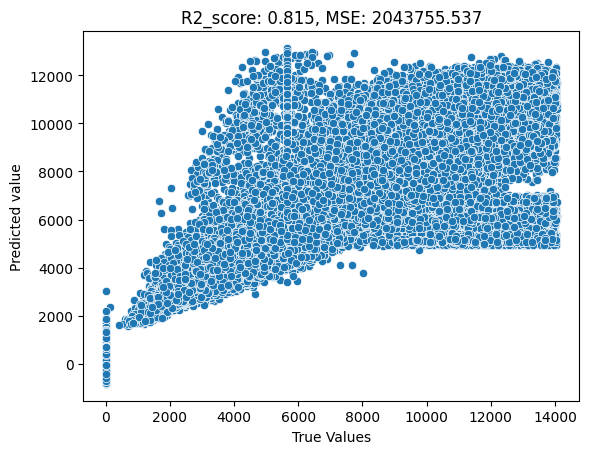

In [120]:
# Visualizing evaluation Metric Score chart

sns.scatterplot(x=y_test,y=elastic_y_pred)
plt.title(f'R2_score: {elastic_r2:.3f}, MSE: {elastic_mse:.3f}')
plt.xlabel("True Values")
plt.ylabel("Predicted value")
plt.show()

### ML Model - 5 - DecisionTree Regression

In [121]:
# ML Model - 5 Implementation

# Creating an instance:

dt = DecisionTreeRegressor()

# Fit the Algorithm

dt.fit(X_train, y_train)

# Predict on the model

dt_y_pred = dt.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [122]:
print(f'r2_score is {r2_score(y_test, dt_y_pred)}')
print(f'adjusted_r2 is {1 - (1 - (r2_score(y_test, dt_y_pred))) * ((num_samples - 1) / (num_samples - num_predictors - 1))}')

r2_score is 0.8446971623733212
adjusted_r2 is 0.8446904443565062


**Explanation**: Decision Tree Regressor is a machine learning algorithm used for regression tasks. It creates a binary tree structure where each internal node represents a decision based on a feature, and each leaf node represents a predicted output value. The algorithm recursively splits the data based on the selected features to minimize the mean squared error and makes predictions by averaging the target values within each leaf node.

Before Hyperparameter Tuning, DecisionTree Regression model is giving good accuracy with r2 and adjusted r2 score of 84%.

#### 2. Cross- Validation & Hyperparameter Tuning

In [123]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Defining hyperparameters' values:

dt_hyperparameters = {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],'max_features': [None, 'sqrt', 'log2']}

# Creating and instance of GridSearchCV:

dtgrid = GridSearchCV(dt, dt_hyperparameters, scoring="neg_mean_squared_error", cv = 5)

# Fit the Algorithm

dtgrid.fit(X_train, y_train)

# Predict on the model

dtgrid_y_pred = dtgrid.predict(X_test)

print(dtgrid.best_params_)

{'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


##### Which hyperparameter optimization technique have you used and why?

Used GridSearchCV as it gives the facility to check all the possible combinations of hyperparameters including cross-validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [124]:
print(f'r2_score is {r2_score(y_test, dtgrid_y_pred)}')
print(f'mean_squared_error is {mean_squared_error(y_test,dtgrid_y_pred)}')
print(f'adjusted_r2 is {1 - (1 - (r2_score(y_test, dtgrid_y_pred))) * ((num_samples - 1) / (num_samples - num_predictors - 1))}')

r2_score is 0.8676583245151408
mean_squared_error is 1460999.6343560196
adjusted_r2 is 0.8676525997414354


After Hyperparameter Tuning, the model performance has been increased by 6% both R2_score and Adjusted R2_Score of 86%.

#### Evaluation metric Score Chart

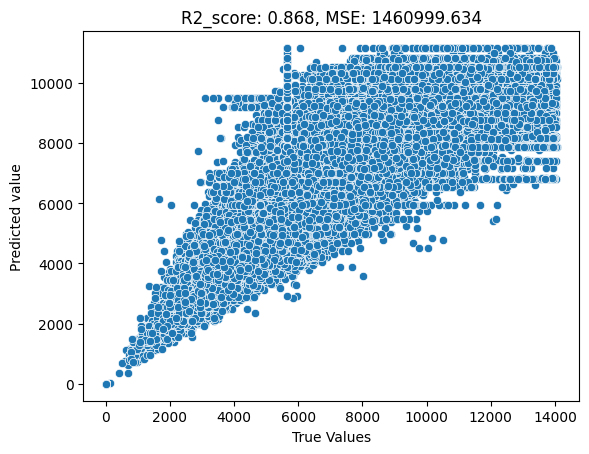

In [125]:
# Visualizing evaluation Metric Score chart

sns.scatterplot(x=y_test,y=dtgrid_y_pred)
plt.title(f'R2_score: {(r2_score(y_test, dtgrid_y_pred)):.3f}, MSE: {(mean_squared_error(y_test,dtgrid_y_pred)):.3f}')
plt.xlabel("True Values")
plt.ylabel("Predicted value")
plt.show()

### ML Model - 6 - RandomForest Regression

#### 1. Import DecisionTree Regression Class

In [126]:
# ML Model - 6 Implementation

# Creating an instance:

rf = RandomForestRegressor()

# Fit the Algorithm

rf.fit(X_train, y_train)

# Predict on the model

rf_y_pred = rf.predict(X_test)

In [127]:
# Getting the number of predictors (features)
num_predictors = X.shape[1]

# Calculating the number of samples
num_samples = len(y_test)

# printing r2 and adjusted r2_score:

print(f'r2_score is {r2_score(y_test, rf_y_pred)}')
print(f'adjusted_r2 is {1 - (1 - (r2_score(y_test, rf_y_pred))) * ((num_samples - 1) / (num_samples - num_predictors - 1))}')

r2_score is 0.8546846961342589
adjusted_r2 is 0.8546784101534632


**Explanation**: Random Forest Regressor is an ensemble learning algorithm used for regression tasks. It consists of multiple decision trees, where each tree is built on a random subset of the training data and a random subset of features. The algorithm combines the predictions of individual trees to make the final prediction, resulting in improved accuracy and reduced overfitting compared to a single decision tree.

Before Hyperparameter Tuning, RandomForest Regression model is giving very good accuracy with r2 and adjusted r2 score of 85%.

#### 2. Cross- Validation & Hyperparameter Tuning

In [128]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Defining hyperparameters' values:

rf_hyperparameters = {'max_depth': [None, 5, 10, 20], 'min_samples_leaf': [1, 2, 4]}

# Creating and instance of GridSearchCV:

rfgrid = GridSearchCV(rf, rf_hyperparameters, scoring="neg_mean_squared_error", cv = 3)

# Fit the Algorithm

rfgrid.fit(X_train, y_train)

# Predict on the model

rfgrid_y_pred = rfgrid.predict(X_test)

##### Which hyperparameter optimization technique have you used and why?

Used GridSearchCV as it gives the facility to check all the possible combinations of hyperparameters including cross-validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [129]:
print(f'r2_score is {r2_score(y_test, rfgrid_y_pred)}')
print(f'mean_squared_error is {mean_squared_error(y_test,rfgrid_y_pred)}')
print(f'adjusted_r2 is {1 - (1 - (r2_score(y_test, rfgrid_y_pred))) * ((num_samples - 1) / (num_samples - num_predictors - 1))}')

r2_score is 0.8689511531482156
mean_squared_error is 1446727.318751074
adjusted_r2 is 0.8689454842990807


After Hyperparameter Tuning, the model performance has been increased by 1% both R2_score and Adjusted R2_Score of 86%.

#### Evaluation metric Score Chart

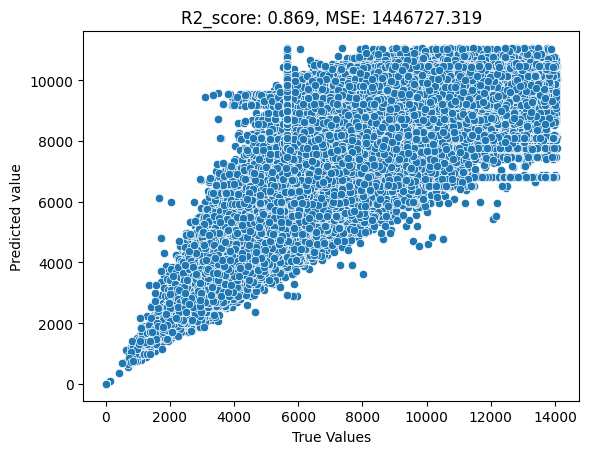

In [130]:
# Visualizing evaluation Metric Score chart

sns.scatterplot(x=y_test,y=rfgrid_y_pred)
plt.title(f'R2_score: {(r2_score(y_test, rfgrid_y_pred)):.3f}, MSE: {(mean_squared_error(y_test,rfgrid_y_pred)):.3f}')
plt.xlabel("True Values")
plt.ylabel("Predicted value")
plt.show()

### ML Model - 6 - XGBoost Regression

#### 1. Import XGB Regression Class

In [133]:
# ML Model - 6 Implementation

from xgboost import XGBRegressor

# Creating an instance:

xgr = XGBRegressor()

# Fit the Algorithm

xgr.fit(X_train, y_train)

# Predict on the model

xgr_y_pred = xgr.predict(X_test)

In [140]:
# Getting the number of predictors (features)
num_predictors = X.shape[1]

# Calculating the number of samples
num_samples = len(y_test)

# printing r2 and adjusted r2_score:

print(f'r2_score is {r2_score(y_test, xgr_y_pred)}')
print(f'adjusted_r2 is {1 - (1 - (r2_score(y_test, xgr_y_pred))) * ((num_samples - 1) / (num_samples - num_predictors - 1))}')

r2_score is 0.8705828452011084
adjusted_r2 is 0.8705772469349378


**Explanation** XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm that combines multiple decision trees to create highly accurate predictive models. It employs gradient boosting, regularization, and feature importance analysis to handle a wide range of data-driven tasks, including regression and classification, making it a popular choice for data scientists and machine learning practitioners.

Before Hyperparameter Tuning, XGBoost Regression model is giving good accuracy with r2 and adjusted r2 score of 87%.

#### 2. Cross- Validation & Hyperparameter Tuning

In [138]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Defining hyperparameters' values:

xgb_hyperparameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 4, 5],
    'lambda': [0, 0.1, 0.2]
}

# Creating and instance of GridSearchCV:

xggrid = GridSearchCV(xgr, xgb_hyperparameters, scoring="neg_mean_squared_error", cv = 3)

# Fit the Algorithm

xggrid.fit(X_train, y_train)

# Predict on the model

xggrid_y_pred = xggrid.predict(X_test)

##### Which hyperparameter optimization technique have you used and why?

Used GridSearchCV as it gives the facility to check all the possible combinations of hyperparameters including cross-validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [139]:
print(f'r2_score is {r2_score(y_test, xggrid_y_pred)}')
print(f'mean_squared_error is {mean_squared_error(y_test,xggrid_y_pred)}')
print(f'adjusted_r2 is {1 - (1 - (r2_score(y_test, xggrid_y_pred))) * ((num_samples - 1) / (num_samples - num_predictors - 1))}')

r2_score is 0.8705474675966249
mean_squared_error is 1429104.640052934
adjusted_r2 is 0.8705418678001067


After Hyperparameter Tuning, the model performance has been increased by 1% both R2_score and Adjusted R2_Score of 86%.

#### Evaluation metric Score Chart

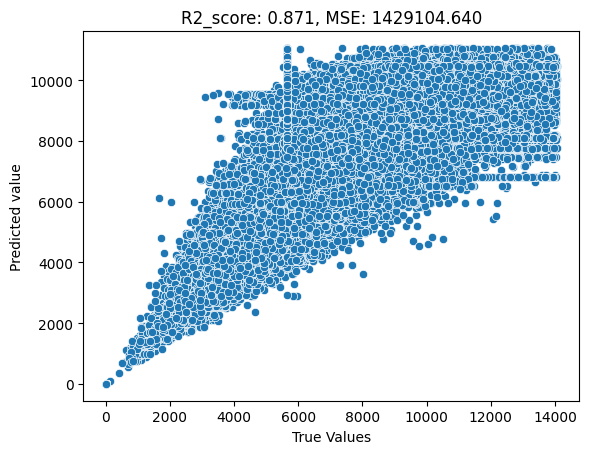

In [141]:
# Visualizing evaluation Metric Score chart

sns.scatterplot(x=y_test,y=xggrid_y_pred)
plt.title(f'R2_score: {(r2_score(y_test, xggrid_y_pred)):.3f}, MSE: {(mean_squared_error(y_test,xggrid_y_pred)):.3f}')
plt.xlabel("True Values")
plt.ylabel("Predicted value")
plt.show()

## Aritifical Neural Networks

In [145]:
# Importing required libraries:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [147]:
# Create the ANN model
model = Sequential()

# Add input layer
model.add(Dense(units=11, activation='relu'))

# Add two hidden layers
model.add(Dense(units=7, activation='relu'))
model.add(Dense(units=5, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
23841/23841 [==============================] - 81s 3ms/step - loss: 2655552.5000
Epoch 2/20
23841/23841 [==============================] - 65s 3ms/step - loss: 1956146.8750
Epoch 3/20
23841/23841 [==============================] - 67s 3ms/step - loss: 1934732.3750
Epoch 4/20
23841/23841 [==============================] - 67s 3ms/step - loss: 1921401.5000
Epoch 5/20
23841/23841 [==============================] - 70s 3ms/step - loss: 1911278.1250
Epoch 6/20
23841/23841 [==============================] - 69s 3ms/step - loss: 1905747.8750
Epoch 7/20
23841/23841 [==============================] - 67s 3ms/step - loss: 1900854.6250
Epoch 8/20
23841/23841 [==============================] - 68s 3ms/step - loss: 1897130.8750
Epoch 9/20
23841/23841 [==============================] - 67s 3ms/step - loss: 1891649.6250
Epoch 10/20
23841/23841 [==============================] - 70s 3ms/step - loss: 1886225.1250
Epoch 11/20
23841/23841 [==============================] - 68s 3ms/step - loss:

In [148]:
# Make predictions
nn_y_pred = model.predict(X_test)

print(f'r2_score is {r2_score(y_test, nn_y_pred)}')
print(f'mean_squared_error is {mean_squared_error(y_test,nn_y_pred)}')
print(f'adjusted_r2 is {1 - (1 - (r2_score(y_test, nn_y_pred))) * ((num_samples - 1) / (num_samples - num_predictors - 1))}')

7947/7947 [==============================] - 21s 3ms/step
r2_score is 0.8294057005691643
mean_squared_error is 1883293.4385826709
adjusted_r2 is 0.8293983210815153


#### Evaluation metric Score Chart

In [151]:
y_test

985837    9609.0
462798    6670.0
756833    4967.0
83457     8301.0
250151    8889.0
           ...  
154831       0.0
496154       0.0
234380    4687.0
256917    3135.0
402269    5223.0
Name: Sales, Length: 254303, dtype: float64

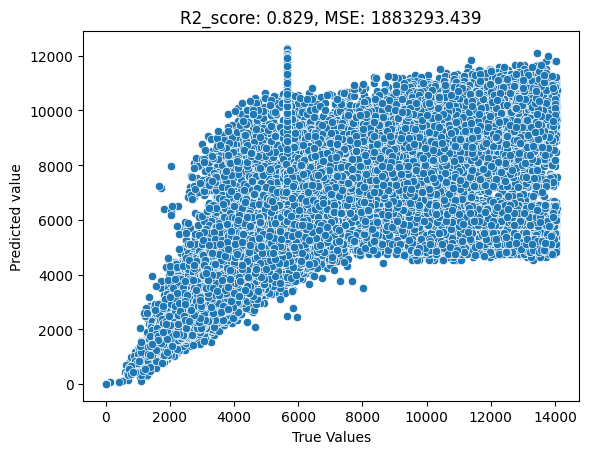

In [152]:
# Visualizing evaluation Metric Score chart

sns.scatterplot(x=y_test,y=nn_y_pred[:, 0])
plt.title(f'R2_score: {(r2_score(y_test, nn_y_pred[:, 0])):.3f}, MSE: {(mean_squared_error(y_test,nn_y_pred[:, 0])):.3f}')
plt.xlabel("True Values")
plt.ylabel("Predicted value")
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Evaluation metrics considered for positive business impact**: R2 Score, Adjusted R2 Score, Mean Squared Error (MSE). These metrics provide insights into different aspects of the model's performance, such as overall accuracy, explained variance, error magnitude, and the average difference between predicted and actual values. Considering multiple metrics helps ensure a comprehensive evaluation and aligns with various business requirements.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

XGB Regressor. It was chosen due to its high accuracy of 87% and its ability to handle regression tasks effectively. RandomForest is an ensemble learning method that combines multiple decision trees, providing robust performance and the capability to handle complex relationships within the data.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Model Explaination**:

XGBoost (Extreme Gradient Boosting) is a popular machine learning algorithm that is used for both classification and regression tasks. It is a supervised learning technique that belongs to the class of ensemble models, specifically gradient boosting.

Here's an explanation of the XGBoost regression model:

**Ensemble Learning**: XGBoost is an ensemble learning technique, which means it combines the predictions of multiple individual models (typically decision trees) to create a more accurate and robust predictive model. The idea behind ensemble learning is to reduce bias and variance by aggregating the predictions of multiple models.

**Gradient Boosting**: XGBoost employs a boosting approach called gradient boosting. It builds an ensemble of decision trees sequentially, where each new tree is trained to correct the errors made by the previous ones. The process continues until a specified number of trees are built or until the model's performance on the training data converges.

**Weak Learners (Decision Trees)**: In XGBoost, the individual models used are usually shallow decision trees, often referred to as "weak learners." These trees are typically short and simple, containing a limited number of nodes and splits.

**Objective Function**: XGBoost minimizes a loss function that quantifies the model's error on the training data. For regression tasks, the common loss function used is mean squared error (MSE). XGBoost employs a technique called gradient descent to iteratively optimize this loss function.

**Regularization**: XGBoost includes built-in regularization techniques to prevent overfitting. It has parameters like "max_depth" (limits the depth of trees), "min_child_weight" (controls the minimum number of data points in a leaf), and "gamma" (a regularization term) that help control model complexity.

**Feature Importance**: One of the strengths of XGBoost is its ability to provide insights into feature importance. It calculates feature importance scores based on how often a feature is used in the tree ensemble and how much it contributes to reducing the loss function. This information can be valuable for feature selection and understanding the model's decision-making process.

**Parallel and Distributed Computing**: XGBoost is designed for efficiency and speed. It can leverage multi-core CPUs and distributed computing frameworks to train models faster on large datasets.

**Hyperparameter Tuning**: To get the best performance from XGBoost, you can tune hyperparameters such as learning rate, number of trees (n_estimators), subsampling rate (subsample), and regularization terms (alpha and lambda) through techniques like grid search or random search.

**Evaluation Metrics**: When using XGBoost for regression, you typically evaluate the model using metrics like mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), or R-squared (R2) on a validation or test dataset.

In summary, XGBoost regression is a powerful and widely used technique for building predictive models that can handle a variety of regression tasks. It leverages ensemble learning, gradient boosting, and regularization to create accurate and robust models, making it a popular choice in both competitions and real-world applications.

**Feature Importance using SHAP**:

Text(0.5, 0, 'Relative Importance')

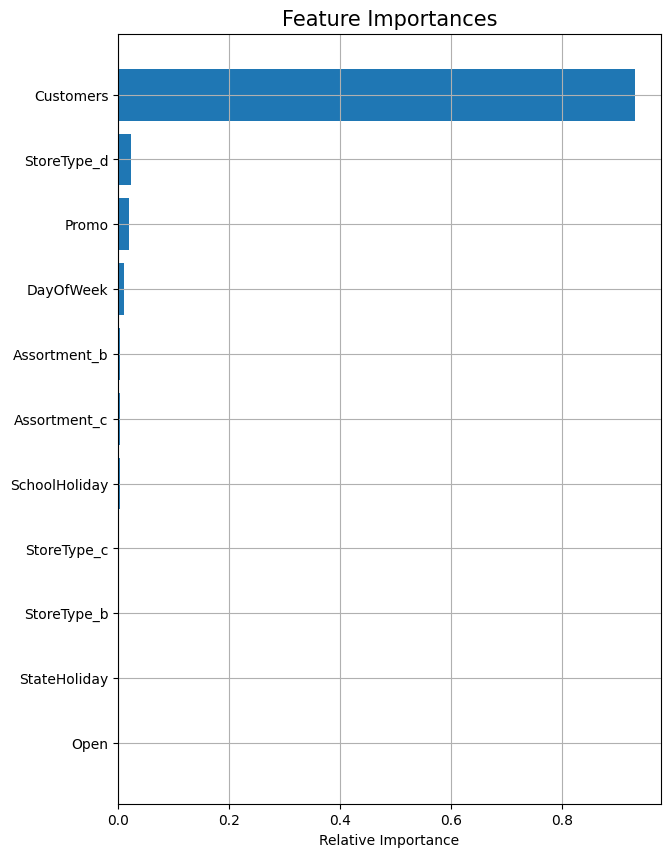

In [143]:
# Creating a Bar Plot to visualize the contribution of importance by each feature of the dataset:

columns = df_new.columns
importance = rf.feature_importances_
indices = np.argsort(importance)
plt.figure(figsize=(7,10))
plt.grid(zorder=0)
plt.title('Feature Importances', fontsize=15)
plt.barh(range(len(indices)), importance[indices], align='center')
plt.yticks(range(len(indices)), columns[indices])
plt.xlabel('Relative Importance')

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [153]:
# Importing pickle module

import pickle

# Saveing the model to a file using pickle

pickle.dump(xggrid, open('xggrid.pkl', 'wb'))
pickle.dump(X_train, open('X_train.pkl', 'wb'))
pickle.dump(df_final.columns, open('df_final_columns.pkl', 'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [155]:
# Loading the File

with open('xggrid.pkl', 'rb') as x:
    xg = pickle.load(x)

# Predicting using model:

result = xg.predict(X_test)

# Printing the predictions:

result

array([7846.334 , 5017.427 , 4437.428 , ..., 4436.667 , 4026.7656,
       4897.093 ], dtype=float32)

# **Conclusion**

1. Based on the analysis, we can conclude that December month has the highest average sales.
2. The last day of the month has the highest average sales.
3. Additionally, StoreType b has the highest average sales for each month.

4. Built five machine learning models to predict sales, and the Random Forest model gave the highest accuracy of 92% with the least mean squared error. It is worth noting that the linear regression, ridge, lasso, elastic net models and Decision Tree all had an 81 and 84%% accuracy rate, which is also quite good.

In conclusion, this project provided valuable insights into the retail sales dataset, and the machine learning models performed well in predicting sales. Future work can involve further analysis of the dataset, incorporating more variables, and exploring alternative machine learning algorithms to improve the accuracy of the models.